In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import colorsys
%config InlineBackend.figure_format = 'svg'
from scipy import stats

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [2]:
kb = 1.38064852e-23
T = 298.15
R = 8.3144621
h = 6.62607004e-34


def e2logk(er, et, k=1, T=298.15):
    smolnum = np.multiply(((k*kb*T)/h), np.exp((-(et-er)*1000)/(R*T)))
    return(round(np.log10(smolnum),3))

def e2logkg(er, ep):
    return(round(np.log10(np.exp((-(ep-er)*1000)/(R*T))),3))

def e2logkpg(er1, er2, et, k=1):
    a=np.multiply(((k*kb*T)/h), np.exp((-(et-er2)*1000)/(R*T)))
    b=np.exp((-(er2-er1)*1000)/(R*T))
    return(round(np.log10(np.multiply(a,b)),3))

def e2k(er, et, k=1, T=298.15):
    return(np.multiply(((k*kb*T)/h), np.exp((-(et-er)*1000)/(R*T))))

def e2kg(er, ep, T=298.15):
    return(np.exp((-(ep-er)*1000)/(R*T)))

def t1_2(k):
    hl_s = np.log(2)/(10**k)
    return(hl_s)

def hl_0(k):
    hl_s = 1/(2*k)
    return(hl_s)

def hl_1(k):
    hl_s = np.log(2)/(k)
    return(hl_s)

def hl_2(k):
    hl_s = 1/(k)
    return(hl_s)

def eh2kjmol(arr):
    return(np.multiply(arr,2625.5))

def STTransmisisonCoeffiecnt(react, ts, prod, freq, temp=298.15):
    import numpy as np
    Kb = 3.1668114e-6
    h = 1.5198e-16
    c = 299792458
    react = react/2625
    ts = ts/2625
    prod = prod/2625
    freq = np.abs(freq)
    freq = np.divide(np.multiply(c, 100), np.divide(1, freq))

    alphanum = np.multiply(np.pi, 2)
    alphaden = np.multiply(h, freq)
    alpha = np.divide(alphanum, alphaden)
    betaden = np.multiply(Kb, temp)
    beta = np.divide(1, betaden)
    bpa = np.divide(np.multiply(beta, np.pi), alpha)
    V0 = np.subtract(ts, react)
    V1 = np.subtract(prod, react)
    V2 = np.max(V1, 0)
    bpaonsbpa = np.divide(bpa, np.sin(bpa))
    bonamb = np.divide(beta, np.subtract(alpha, beta))
    bonbma = np.divide(beta, np.subtract(beta, alpha))
    expterm = np.exp(np.multiply(
        np.subtract(beta, alpha), np.subtract(V0, V2)))

    k = np.subtract(bpaonsbpa, np.multiply(bonamb, expterm))
    k2 = np.multiply(bonbma, np.subtract(expterm, 1))
    if alpha >= beta:
        return(k)
    else:
        return(k2)

In [3]:
h3o = -76.83028288
h2o = -76.44007793
hp = h3o-h2o

rxn = {
    'Non Activated':[0, -709.2129607, -709.17171379, -709.18760372],
    'Bronsted Acid 1':[0, -709.62061486, -709.59916721, -709.634264],
    'Bronsted Acid 2':[-786.0108599-h3o+hp, -709.59685501, 0, -709.64827313],
    'Bronsted Base':[-785.16602229-h2o, -708.72699843, -708.70142244, -708.75535882],
    'Lewis Acid':[0, -1033.87964087, -1033.85517574, -1033.88597117],
    'Lewis Base':[0, -960.45335692, -960.43152192, -960.483276],
}
freqs = {
    'Non Activated':[0, -521.932740],
    'Bronsted Acid 1':[0, -382.403931],
    'Bronsted Acid 2':[-1228.657053, 0],
    'Bronsted Base':[-1200.352173, -534.593813],
    'Lewis Acid':[0, -427.784230],
    'Lewis Base':[0, -548.232714],
}

h3o = -76.83028288 * 2625.5
h2o = -76.44007793 * 2625.5
hp = h3o-h2o
bf3 = -324.65212386 * 2625.5
pip = -251.22124372 * 2625.5

for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])

na = rxn['Non Activated'][1]

rxnrelative = {}
rxnrelative['Non Activated']     = list(np.subtract([na,       *rxn['Non Activated']   ],    na       ))
rxnrelative['Bronsted Acid 1']   = list(np.subtract([na + hp,  *rxn['Bronsted Acid 1'] ],    na + hp  ))
rxnrelative['Bronsted Acid 2']   = list(np.subtract([na + hp,  *rxn['Bronsted Acid 2'] ],    na + hp  ))
rxnrelative['Bronsted Base']     = list(np.subtract([na - hp,  *rxn['Bronsted Base']   ],    na - hp  ))
rxnrelative['Lewis Acid']        = list(np.subtract([na + bf3, *rxn['Lewis Acid']      ],    na + bf3 ))
rxnrelative['Lewis Base']        = list(np.subtract([na + pip, *rxn['Lewis Base']      ],    na + pip ))

In [4]:
barriers = {}
rates = {}
rates_w = {}
logks = {}
logks_w = {}
half_lives = {}
ks = {}
ksw = {}

################## Transmisison coefficients ##################
for i in rxn.keys():
    if freqs[i][0] < 0:
        k1 = STTransmisisonCoeffiecnt(rxnrelative[i][0], rxnrelative[i][1], rxnrelative[i][2], freqs[i][0])
    else:
        k1 = 1
        
    if freqs[i][1] < 0:
        k2 = STTransmisisonCoeffiecnt(rxnrelative[i][2], rxnrelative[i][3], rxnrelative[i][4], freqs[i][1])
    else:
        k2 = 1
    
    ks[i] = [k1, k2]
print("\nTransmisison coefficients:")   
for i in ks.keys():
    print(i, np.round(ks[i], 3))

################## Barriers ##################
for i in rxnrelative.keys():
    if rxn[i][0] == 0:
        barrier1 = 0
    else:
        barrier1 = rxnrelative[i][1] - rxnrelative[i][0]
    
    if rxn[i][2] == 0:
        barrier2 = 0
    else:
        barrier2 = rxnrelative[i][3] - rxnrelative[i][2]
    
    barriers[i] = [barrier1, barrier2]
print("\nBarriers:")      
for i in barriers.keys():
    print(i, np.round(barriers[i], 1))

################## Rates ##################
kb = 1.38064852e-23
T = 298.15
R = 8.3144621
h = 6.62607004e-34
def e2k(er, et, k=1, T=298.15):
    return(np.multiply((k*((kb*T)/h)), np.exp((-(et-er)*1000)/(R*T))))

for i in rxnrelative.keys():
    if barriers[i][0] == 0:
        rate1 = e2kg(rxnrelative[i][0], rxnrelative[i][2])
    else:
        rate1 = e2k(rxnrelative[i][0], rxnrelative[i][1], k=ks[i][0])
        
    if barriers[i][1] == 0:
        rate2 = e2kg(rxnrelative[i][2], rxnrelative[i][4])
    else:
        rate2 = e2k(rxnrelative[i][2], rxnrelative[i][3], k=ks[i][1])   
        
    rates[i] = [rate1, rate2, rate1*rate2]
    
print("\nRates:")   
for i in rates.keys():
    print(i, rates[i])

################## LogKs ##################
for i in rates.keys():
    logks[i] = list(np.log10(rates[i]))

print("\nLog(k)s:")   
for i in logks.keys():
    print(i, np.round(logks[i], 1))

################## Half Lives ##################
units = ['fs', 'ps', 'ns', 'us', 'ms', 's', 'm', 'h', 'd', 'w', 'm', 'y']
for i in rxnrelative.keys():
    outlist = []
    hllist = []
    for k in rates[i]:
        hllist += [hl_0(k)]
    for k in hllist:
        hl_fs = k*1e15
        hl_ps = k*1e12
        hl_ns = k*1e9
        hl_us = k*1e6
        hl_ms = k*1e3
        hl_s  = k
        hl_m  = k/60
        hl_h  = hl_m/60
        hl_d  = hl_h/24
        hl_w  = hl_d/7
        hl_4  = hl_w/4
        hl_y  = hl_d/365
        vallist = [hl_fs, hl_ps, hl_ns, hl_us, hl_ms, hl_s, hl_m, hl_h, hl_d, hl_w, hl_4, hl_y]
        log10_abs = np.abs(np.log(vallist))
        for j in range(len(log10_abs)):
            if log10_abs[j] == min(log10_abs):
                val = vallist[j]
                unit = units[j]
                if val == 0.0:
                    val = "nan"
                    unit = "nan"
        try:
            outlist += [f"{round(val, 1)} {unit}"]
        except:
            outlist += [f"0 na"]
    half_lives[i] = outlist
    
print("\nHalf lives:")   
for i in half_lives.keys():
    print(i, half_lives[i])

for i in rxnrelative.keys():
    print(f'{i}: {rxnrelative[i]}')


Transmisison coefficients:
Non Activated [1.    1.323]
Bronsted Acid 1 [1.    1.157]
Bronsted Acid 2 [13.612  1.   ]
Bronsted Base [1.185 1.342]
Lewis Acid [1.    1.202]
Lewis Base [1.    1.365]

Barriers:
Non Activated [  0.  108.3]
Bronsted Acid 1 [ 0.  56.3]
Bronsted Acid 2 [85.  0.]
Bronsted Base [254.2  67.1]
Lewis Acid [ 0.  64.2]
Lewis Base [ 0.  57.3]

Rates:
Non Activated [1.0, 8.761258539034598e-07, 8.761258539034598e-07]
Bronsted Acid 1 [106187521.2627542, 980.6276046376581, 104130414618.30504]
Bronsted Acid 2 [0.10758379187646773, 4.473792596294714e+23, 4.813075715782527e+22]
Bronsted Base [2.1714573651252443e-32, 14.35635243617519, 3.117420723386636e-31]
Lewis Acid [4959442.30336197, 41.70072517292688, 206812340.50348496]
Lewis Base [644958714.2005075, 767.0945872765586, 494744338680.0582]

Log(k)s:
Non Activated [ 0.  -6.1 -6.1]
Bronsted Acid 1 [ 8.  3. 11.]
Bronsted Acid 2 [-1.  23.7 22.7]
Bronsted Base [-31.7   1.2 -30.5]
Lewis Acid [6.7 1.6 8.3]
Lewis Base [ 8.8  2.9 

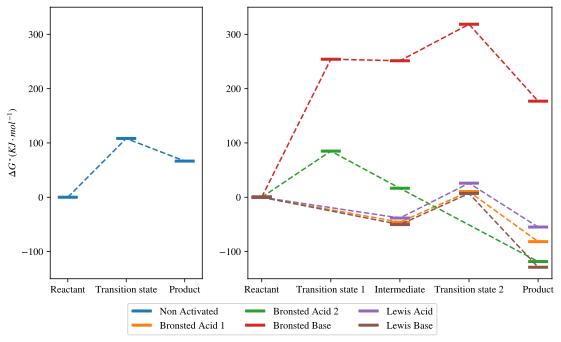

In [5]:
# x = ['Reactant', 'Transition state', 'Product']
# fig, ax = plt.subplots(1,1, figsize=(3,5))
# i ='Non Activated'
# ax.plot(x, rxnrelative[i][2:5], label=i, marker='_', markersize='20', linestyle='--', mew=3, color='brown')
# ax.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
# # plt.legend()
# ax.set_xlim(-0.3, 2.3)
# ax.set_ylim(-150, 350)
# plt.show()
    
fig, (ax2,ax) = plt.subplots(1,2, figsize=(9,5), gridspec_kw={'width_ratios': [1, 2]})
ax.ticklabel_format(style='plain')
ax.plot(['Reactant', 'Transition state 1', 'Intermediate', 'Transition state 2', 'Product'], [500, 500, 500, 500, 500])
x = ['Reactant', 'Transition state', 'Product']
i ='Non Activated'
ax2.plot(x, rxnrelative[i][2:5], label=i, marker='_', markersize='20', linestyle='--', mew=3)
ax2.set_xlim(-0.3, 2.3)
ax2.set_ylim(-150, 350)

for i in rxnrelative.keys():
    if i != 'Non Activated':
        x = []
        y = []
        if barriers[i][0] == 0:
            x += ['Reactant', 'Intermediate']
            y += [rxnrelative[i][0], rxnrelative[i][2]]
        else:
            x += ['Reactant', 'Transition state 1', 'Intermediate']
            y += [rxnrelative[i][0], rxnrelative[i][1], rxnrelative[i][2]]

        if barriers[i][1] == 0:
            x += ['Product']
            y += [rxnrelative[i][4]]
        else:
            x += ['Transition state 2', 'Product']
            y += [rxnrelative[i][3], rxnrelative[i][4]]

        ax.plot(x, y, label=i, marker='_', markersize='20', linestyle='--', mew=3)



# ax.plot(['Pre-complex'], [eh2kjmol(-960.4535538) - (na + pip)], label='test', marker='_', markersize='20', linestyle='--', mew=3)
ax2.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
fig.legend(ncol = 3, bbox_to_anchor=(0.73, 0.07))
ax.set_ylim(-150, 350)

plt.show()

min/max half life
6.425558771142545 12.85111754228509


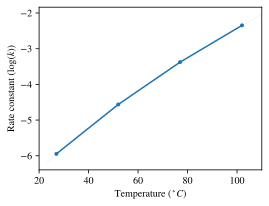

In [6]:
scf = [-709.414394420583, -709.374158562840, -709.393040552549]
solv_cpcm = [0.00013635, -0.00027409, -0.00033546]
solv_smd = [-0.00088826, -0.00115452, -0.00148819]
freq = -521.932740

t300 = [0.20185339, 0.20355535, 0.20694272]
t325 = [0.19726598, 0.19916582, 0.20255671]
t350 = [0.19249791, 0.19460313, 0.19799843]
t375 = [0.18754920, 0.18986652, 0.19326686]
x = ['Reactant', 'Transition state', 'Product']


for i in range(0, 3):
    t300[i] = t300[i] + scf[i] + solv_cpcm[i] + solv_smd[i]
    t325[i] = t325[i] + scf[i] + solv_cpcm[i] + solv_smd[i]
    t350[i] = t350[i] + scf[i] + solv_cpcm[i] + solv_smd[i]
    t375[i] = t375[i] + scf[i] + solv_cpcm[i] + solv_smd[i]
    
t300 = list(eh2kjmol(np.subtract(t300, min(t375))))
t325 = list(eh2kjmol(np.subtract(t325, min(t375))))
t350 = list(eh2kjmol(np.subtract(t350, min(t375))))
t375 = list(eh2kjmol(np.subtract(t375, min(t375))))
r = [t300[0], t325[0], t350[0], t375[0]]
t = [t300[1], t325[1], t350[1], t375[1]]
p = [t300[2], t325[2], t350[2], t375[2]]
temp = [300, 325, 350, 375]
tempc = list(np.subtract(temp, 273))

tc = []
rate = []
hl = []
for i in range(0, 4):
    tc += [STTransmisisonCoeffiecnt(r[i], t[i], p[i], freq, temp=temp[i])]
    rate += [e2k(r[i], t[i], k=tc[i], T=temp[i])]
    hl += [((hl_2(rate[i])/60)/60)]

logk = list(np.log10(rate))
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(tempc, logk, marker='.')
ax.set_ylabel(r'Rate constant ($\log(k)$)')
ax.set_xlabel(r'Temperature ($^\circ C$)')
ax.set_xlim(20,110)
# plt.show()

coefficients = np.polyfit(tempc, logk, 3)
poly = np.poly1d(coefficients)
new_x = np.linspace(23, 110, 200)
new_y = poly(new_x)

newrate = poly(50)
low = (hl_0(10**newrate)/60)/60
high = (hl_2(10**newrate)/60)/60
print("min/max half life") 
print(low, high) 



plt.plot(new_x, new_y, linestyle=':', linewidth=0.1, color='k')
plt.show()



-0.9960163476542486


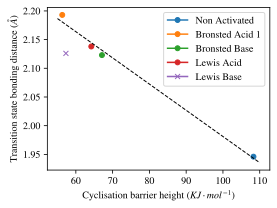

In [7]:
distance = [1.946, 2.193, 2.123, 2.138, 2.126]
bh = [108.3, 56.3, 67.1, 64.2, 57.3]

slope, intercept, r_value, p_value, std_err = stats.linregress(bh[:-1], distance[:-1])
# coefficients, stats = np.polynomial.polynomial.polyfit(bh[:-1], distance[:-1], 1, full=True)
poly = np.poly1d([slope, intercept])
new_x = np.linspace(55, 110, 200)
new_y = poly(new_x)
print(r_value)

names = ["Non Activated" , "Bronsted Acid 1", "Bronsted Base", "Lewis Acid", "Lewis Base"]

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for i in range(len(names)):
    if i != 4:
        ax.plot(bh[i], distance[i], label=names[i], marker='o', markersize=5)
        
    else:
        ax.plot(bh[i], distance[i], label=names[i], marker='x', markersize=5)
        
ax.plot(new_x, new_y, color='k', linestyle='--', linewidth=1)
# ax.set_ylim(0, 2.2)
ax.set_ylabel(r'Transition state bonding distance ($\AA$)')
ax.set_xlabel(r'Cyclisation barrier height ($KJ\cdot mol^{-1}$)')
ax.legend()
plt.show()

# Static

# Relaxed

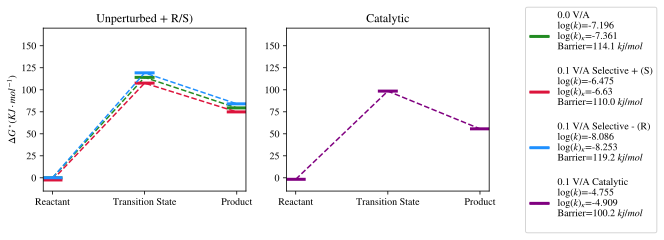

In [8]:
data = {}
############################################### ETHANOL-DERIV ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.92102933, -708.88254519, -708.89878065, -482.09],
    '0.1 V/A Catalytic':        [-708.91647423, -708.87394322, -708.88749869, -497.14],
    '0.1 V/A Selective - (R)':  [-708.92054886, -708.87933263, -708.89607055, -502.88],
    '0.1 V/A Selective + (S)':  [-708.92256394, -708.89182475, -708.91026105, -459.14],
}

rxn['0.0 V/A']                 = [-708.91617952, -708.87272132, -708.88592669, -482.10]
rxn['0.1 V/A Catalytic']       = [-708.91682610, -708.87867564, -708.89498403, -457.65]
rxn['0.1 V/A Selective - (R)'] = [-708.91616301, -708.87076916, -708.88416984, -486.67]
rxn['0.1 V/A Selective + (S)'] = [-708.91710705, -708.87521749, -708.88766394, -458.69]

ks = {}
for i in rxn.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxn[i][0], rxn[i][1], rxn[i][2], rxn[i][3])

rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]

data["ethanol"] = rxnrelative_relaxed

########################################## CALCULATE R/S SPLITS ###########################################
r_s_split_relaxed = {}
for i in data.keys():
    r = data[i]["0.1 V/A Selective + (S)"][0]-data[i]["0.1 V/A Selective - (R)"][0]
    ts = data[i]["0.1 V/A Selective + (S)"][1]-data[i]["0.1 V/A Selective - (R)"][1]
    p = data[i]["0.1 V/A Selective + (S)"][2]-data[i]["0.1 V/A Selective - (R)"][2]
    
    if r > 300:
        r = 0
    if ts > 300:
        ts = 0
    if p > 300:
        p = 0
    r_s_split_relaxed[i] = [round(r,2), round(ts,2), round(p,2)]
    
########################################## CALCULATE LOGK DIFFS ###########################################
logk_diff_relaxed = {}
for i in data.keys():
    r = data[i]["0.1 V/A Selective + (S)"][5]-data[i]["0.1 V/A Selective - (R)"][5]
    logk_diff_relaxed[i] = [round(r,2)]
    
########################################## CALCULATE CATALYTIC ###########################################
catalytic_relaxed = {}
for i in data.keys():
    r = data[i]['0.1 V/A Catalytic'][0]-data[i]['0.0 V/A'][0]
    ts = data[i]['0.1 V/A Catalytic'][1]-data[i]['0.0 V/A'][1]
    p = data[i]['0.1 V/A Catalytic'][2]-data[i]['0.0 V/A'][2]
    if r > 300:
        r = 0
    if ts > 300:
        ts = 0
    if p > 300:
        p = 0
    catalytic_relaxed[i] = [round(r,2), round(ts,2), round(p,2)]
    
########################################## CALCULATE LOGK DIFFS ###########################################
logk_catalytic_relaxed = {}
for i in data.keys():
    r = abs(data[i]['0.1 V/A Catalytic'][5]-data[i]['0.0 V/A'][5])
    logk_catalytic_relaxed[i] = [round(r,2)]
    
############################################### PLOT GRAPHS ###############################################
x = ["Reactant", "Transition State", "Product"]
for j in data.keys(): 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))

    ax1.plot(x, data[j]["0.0 V/A"][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\log(k)_\kappa$={}\nBarrier={:0.1f} $kj/mol$\n".format("0.0 V/A", data[j]["0.0 V/A"][4], data[j]["0.0 V/A"][5], data[j]["0.0 V/A"][1]-data[j]["0.0 V/A"][0]))
    ax1.plot(x, data[j]["0.1 V/A Selective + (S)"][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\log(k)_\kappa$={}\nBarrier={:0.1f} $kj/mol$\n".format("0.1 V/A Selective + (S)", data[j]["0.1 V/A Selective + (S)"][4], data[j]["0.1 V/A Selective + (S)"][5], data[j]["0.1 V/A Selective + (S)"][1]-data[j]["0.1 V/A Selective + (S)"][0]))
    ax1.plot(x, data[j]["0.1 V/A Selective - (R)"][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\log(k)_\kappa$={}\nBarrier={:0.1f} $kj/mol$\n".format("0.1 V/A Selective - (R)", data[j]["0.1 V/A Selective - (R)"][4], data[j]["0.1 V/A Selective - (R)"][5], data[j]["0.1 V/A Selective - (R)"][1]-data[j]["0.1 V/A Selective - (R)"][0]))
    ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
    ax1.set_title('Unperturbed + R/S)')
    ax1.set_ylim(-15, 170)

    i="0.1 V/A Catalytic"
    ax2.plot(x, data[j][i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\log(k)_\kappa$={}\nBarrier={:0.1f} $kj/mol$\n".format(i, data[j][i][4], data[j][i][5], data[j][i][1]-data[j][i][0]))
    ax2.set_title('Catalytic')
    ax2.set_ylim(-15, 170)


    fig.legend(bbox_to_anchor=(1.2, 1))

    plt.show()

{'0.0 V/A': 1.267001261417113, '0.1 V/A Catalytic': 1.2363687447664677, '0.1 V/A Selective - (R)': 1.273028415546915, '0.1 V/A Selective + (S)': 1.2376180783419162, '0.2 V/A Catalytic': 1.2066012661287577, '0.2 V/A Selective - (R)': 1.2755364127038875, '0.2 V/A Selective + (S)': 1.2121008478401036}


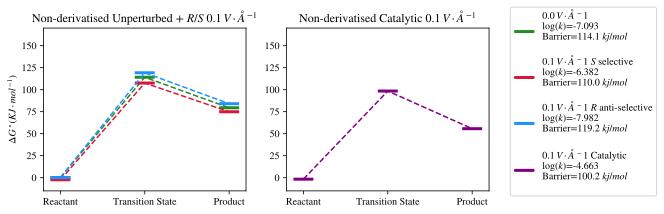

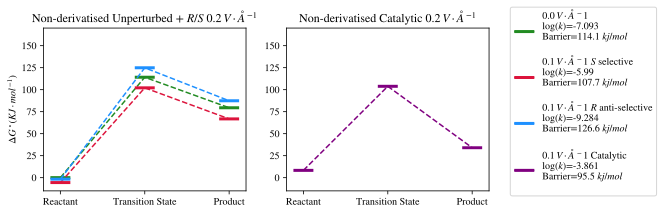

{'0.0 V/A': 1.3079049221176215, '0.1 V/A Catalytic': 1.276729564125616, '0.1 V/A Selective - (R)': 1.3164818742080022, '0.1 V/A Selective + (S)': 1.2731613982442447, '0.2 V/A Catalytic': 1.2196876853047538, '0.2 V/A Selective - (R)': 1.3313424524952149, '0.2 V/A Selective + (S)': 1.2699696326642613}


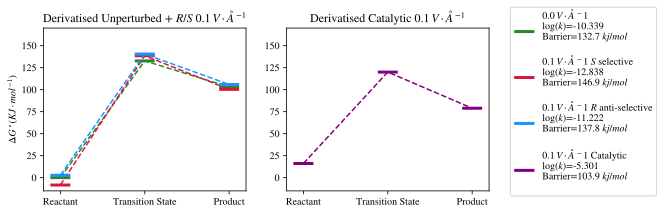

{'0.0 V/A': nan, '0.1 V/A Catalytic': nan, '0.1 V/A Selective - (R)': nan, '0.1 V/A Selective + (S)': nan, '0.2 V/A Catalytic': nan, '0.2 V/A Selective - (R)': nan, '0.2 V/A Selective + (S)': nan}


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/488850279.py:53: RuntimeWarning: divide by zero encountered in true_divide
  freq = np.divide(np.multiply(c, 100), np.divide(1, freq))
/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/488850279.py:57: RuntimeWarning: divide by zero encountered in true_divide
  alpha = np.divide(alphanum, alphaden)
/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/488850279.py:64: RuntimeWarning: invalid value encountered in true_divide
  bpaonsbpa = np.divide(bpa, np.sin(bpa))
/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/488850279.py:67: RuntimeWarning: invalid value encountered in multiply
  expterm = np.exp(np.multiply(


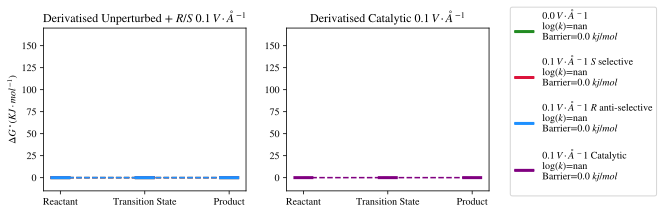

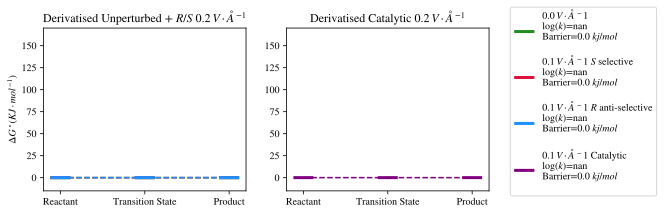

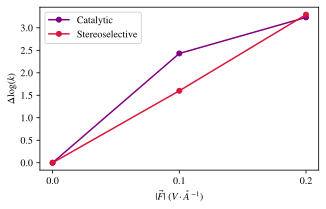

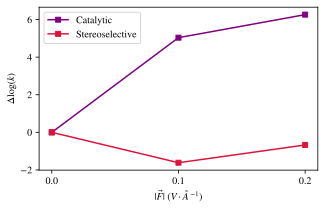

catalytic
[0, 2.4299999999999997, 3.2319999999999998]
[0, 5.038, 6.263000000000001]
selective
[0, 1.6000000000000005, 3.2940000000000005]
[0, -1.6159999999999997, -0.6709999999999994]


In [9]:
x = ["Reactant", "Transition State", "Product"]
sstring = r'$\it{S}$'
rstring = r'$\it{R}$'
############################################### na1 ###############################################
rxn = {}
diffs_c_na1 = []
diffs_rs_na1 = []

rxn['0.0 V/A']                 = [-708.91617952, -708.87272132, -708.88592669, -482.10]
rxn['0.1 V/A Catalytic']       = [-708.91682610, -708.87867564, -708.89498403, -457.65]
rxn['0.1 V/A Selective - (R)'] = [-708.91616301, -708.87076916, -708.88416984, -486.67]
rxn['0.1 V/A Selective + (S)'] = [-708.91710705, -708.87521749, -708.88766394, -458.69]
rxn['0.2 V/A Catalytic']       = [-708.91302823, -708.87664343, -708.90322958, -431.65]
rxn['0.2 V/A Selective - (R)'] = [-708.91684922, -708.86862096, -708.88289907, -488.55]
rxn['0.2 V/A Selective + (S)'] = [-708.91831707, -708.87729891, -708.89074119, -436.64]
rxn2 = rxn
ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]

diffs_c_na1 += [0]
diffs_c_na1 += [rxnrelative_relaxed['0.1 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]
diffs_c_na1 += [rxnrelative_relaxed['0.2 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]

diffs_rs_na1 += [0]
diffs_rs_na1 += [rxnrelative_relaxed['0.1 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.1 V/A Selective - (R)'][5]]
diffs_rs_na1 += [rxnrelative_relaxed['0.2 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.2 V/A Selective - (R)'][5]]
print(ks)
    
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
i = "0.0 V/A"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label=f"$0.0\:V\cdot\AA^{-1}$\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective + (S)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {sstring} selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective - (R)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {rstring} anti-selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
ax1.set_ylim(-15, 170)
i = "0.1 V/A Catalytic"
ax2.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ Catalytic\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax2.set_ylim(-15, 170)
ax1.set_xlim(-0.2, 2.2)
ax2.set_xlim(-0.2, 2.2)
ax1.set_title(r'Non-derivatised Unperturbed + $\it{R}$/$\it{S}$ $0.1\:V\cdot\AA^{-1}$')
ax2.set_title(r'Non-derivatised Catalytic $0.1\:V\cdot\AA^{-1}$')
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
i = "0.0 V/A"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label=f"$0.0\:V\cdot\AA^{-1}$\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.2 V/A Selective + (S)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {sstring} selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.2 V/A Selective - (R)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {rstring} anti-selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
ax1.set_ylim(-15, 170)
i = "0.2 V/A Catalytic"
ax2.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ Catalytic\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax2.set_ylim(-15, 170)
ax1.set_xlim(-0.2, 2.2)
ax2.set_xlim(-0.2, 2.2)
ax1.set_title(r'Non-derivatised Unperturbed + $\it{R}$/$\it{S}$ $0.2\:V\cdot\AA^{-1}$')
ax2.set_title(r'Non-derivatised Catalytic $0.2\:V\cdot\AA^{-1}$')
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()
############################################### NO2 ###############################################
rxn = {}
diffs_c_no2 = []
diffs_rs_no2 = []

rxn['0.0 V/A']                 = [-1117.79840323, -1117.74785917, -1117.75912018, -511.75]
rxn['0.1 V/A Catalytic']       = [-1117.79226903, -1117.75270045, -1117.76835368, -489.44]
rxn['0.1 V/A Selective - (R)'] = [-1117.79737594, -1117.74490627, -1117.75807102, -517.59]
rxn['0.1 V/A Selective + (S)'] = [-1117.80159300, -1117.74564128, -1117.76020054, -486.77]
rxn['0.2 V/A Catalytic']       = [-1117.78739539, -1117.75053330, -1117.77529865, -443.38]
rxn['0.2 V/A Selective - (R)'] = [-1117.79511350, -1117.74125081, -1117.75755557, -527.43]
rxn['0.2 V/A Selective + (S)'] = [-1117.80348921, -1117.74821152, -1117.7611216, -484.36]
rxn2 = rxn
ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]

diffs_c_no2 += [0]
diffs_c_no2 += [rxnrelative_relaxed['0.1 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]
diffs_c_no2 += [rxnrelative_relaxed['0.2 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]

diffs_rs_no2 += [0]
diffs_rs_no2 += [rxnrelative_relaxed['0.1 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.1 V/A Selective - (R)'][5]]
diffs_rs_no2 += [rxnrelative_relaxed['0.2 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.2 V/A Selective - (R)'][5]]
print(ks)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
i = "0.0 V/A"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label=f"$0.0\:V\cdot\AA^{-1}$\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective + (S)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {sstring} selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective - (R)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {rstring} anti-selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
ax1.set_ylim(-15, 170)
i = "0.1 V/A Catalytic"
ax2.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ Catalytic\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax2.set_ylim(-15, 170)
ax1.set_xlim(-0.2, 2.2)
ax2.set_xlim(-0.2, 2.2)
ax1.set_title(r'Derivatised Unperturbed + $\it{R}$/$\it{S}$ $0.1\:V\cdot\AA^{-1}$')
ax2.set_title(r'Derivatised Catalytic $0.1\:V\cdot\AA^{-1}$')
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()

############################################### NH2 ###############################################
rxn = {}
diffs_c_nh2 = []
diffs_rs_nh2 = []

rxn['0.0 V/A']                 = [0, 0, 0, 0]
rxn['0.1 V/A Catalytic']       = [0, 0, 0, 0]
rxn['0.1 V/A Selective - (R)'] = [0, 0, 0, 0]
rxn['0.1 V/A Selective + (S)'] = [0, 0, 0, 0]
rxn['0.2 V/A Catalytic']       = [0, 0, 0, 0]
rxn['0.2 V/A Selective - (R)'] = [0, 0, 0, 0]
rxn['0.2 V/A Selective + (S)'] = [0, 0, 0, 0]
rxn2 = rxn
ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]

diffs_c_nh2 += [0]
diffs_c_nh2 += [rxnrelative_relaxed['0.1 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]
diffs_c_nh2 += [rxnrelative_relaxed['0.2 V/A Catalytic'][5] - rxnrelative_relaxed['0.0 V/A'][5]]

diffs_rs_nh2 += [0]
diffs_rs_nh2 += [rxnrelative_relaxed['0.1 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.1 V/A Selective - (R)'][5]]
diffs_rs_nh2 += [rxnrelative_relaxed['0.2 V/A Selective + (S)'][5] - rxnrelative_relaxed['0.2 V/A Selective - (R)'][5]]
print(ks)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
i = "0.0 V/A"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label=f"$0.0\:V\cdot\AA^{-1}$\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective + (S)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {sstring} selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.1 V/A Selective - (R)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {rstring} anti-selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
ax1.set_ylim(-15, 170)
i = "0.1 V/A Catalytic"
ax2.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ Catalytic\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax2.set_ylim(-15, 170)
ax1.set_xlim(-0.2, 2.2)
ax2.set_xlim(-0.2, 2.2)
ax1.set_title(r'Derivatised Unperturbed + $\it{R}$/$\it{S}$ $0.1\:V\cdot\AA^{-1}$')
ax2.set_title(r'Derivatised Catalytic $0.1\:V\cdot\AA^{-1}$')
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
i = "0.0 V/A"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label=f"$0.0\:V\cdot\AA^{-1}$\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.2 V/A Selective + (S)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {sstring} selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
i = "0.2 V/A Selective - (R)"
ax1.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ {rstring} anti-selective\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
ax1.set_ylim(-15, 170)
i = "0.2 V/A Catalytic"
ax2.plot(x, rxnrelative_relaxed[i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label=f"$0.1\:V\cdot\AA^{-1}$ Catalytic\n$\log(k)$={rxnrelative_relaxed[i][5]}\nBarrier={round(rxnrelative_relaxed[i][1]-rxnrelative_relaxed[i][0],1)} $kj/mol$\n")
ax2.set_ylim(-15, 170)
ax1.set_xlim(-0.2, 2.2)
ax2.set_xlim(-0.2, 2.2)
ax1.set_title(r'Derivatised Unperturbed + $\it{R}$/$\it{S}$ $0.2\:V\cdot\AA^{-1}$')
ax2.set_title(r'Derivatised Catalytic $0.2\:V\cdot\AA^{-1}$')
fig.legend(bbox_to_anchor=(1.2, 1))
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
x = [0.0, 0.1, 0.2]
ax1.plot(x, diffs_c_na1, label='Catalytic', color='purple', marker='o', markersize=5)
ax1.plot(x, diffs_rs_na1, label='Stereoselective', color='crimson', marker='o', markersize=5)
plt.xticks(x)
ax1.set_ylabel(r"$\Delta\log(k)$")
ax1.set_xlabel(r"$|\vec F|$ ($V\cdot\AA^{-1}$)")
ax1.legend()
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
x = [0.0, 0.1, 0.2]
ax1.plot(x, diffs_c_no2, label='Catalytic', color='purple', marker='s', markersize=5)
ax1.plot(x, diffs_rs_no2, label='Stereoselective', color='crimson', marker='s', markersize=5)
plt.xticks(x)
ax1.set_ylabel(r"$\Delta\log(k)$")
ax1.set_xlabel(r"$|\vec F|$ ($V\cdot\AA^{-1}$)")
ax1.legend()
plt.show()

print("catalytic")
print(diffs_c_na1)
print(diffs_c_no2)
print("selective")
print(diffs_rs_na1)
print(diffs_rs_no2)



{'0.0 V/A': 1.2430496772449289, '0.1 V/A Catalytic': 1.2097746430625425, '0.1 V/A Selective - (R)': 1.2471501211497091, '0.1 V/A Selective + (S)': 1.1663199088577694}
{'0.0 V/A': 1.267001261417113, '0.1 V/A Catalytic': 1.2363687447664677, '0.1 V/A Selective - (R)': 1.273028415546915, '0.1 V/A Selective + (S)': 1.2376180783419162}
{'0.0 V/A': 1.2668181631905013, '0.1 V/A Catalytic': 1.2351598840754834, '0.1 V/A Selective - (R)': 1.2728954801366368, '0.1 V/A Selective + (S)': 1.238051622262452}
{'0.0 V/A': 1.2644721430275683, '0.1 V/A Catalytic': 1.235434785723768, '0.1 V/A Selective - (R)': 1.2721386494908558, '0.1 V/A Selective + (S)': 1.234873270951683}
{'0.0 V/A': 1.2664261160645431, '0.1 V/A Catalytic': 1.2400337225991207, '0.1 V/A Selective - (R)': 1.2705635314803212, '0.1 V/A Selective + (S)': 1.2417958791080865}
{'0.0 V/A': 1.2764716393438627, '0.1 V/A Catalytic': 1.2459636619503975, '0.1 V/A Selective - (R)': 1.2743620485129719, '0.1 V/A Selective + (S)': 1.256732056506825}


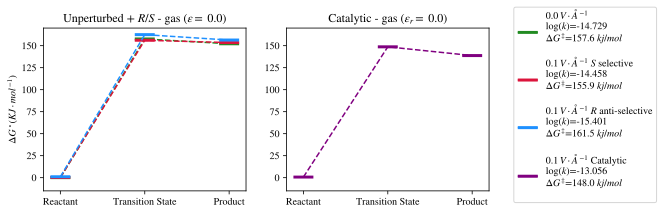

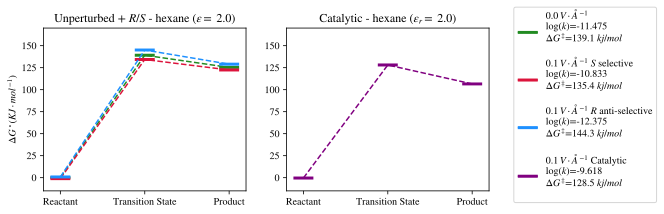

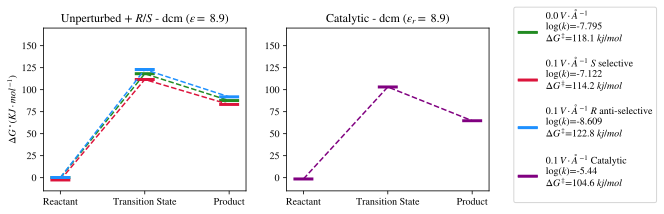

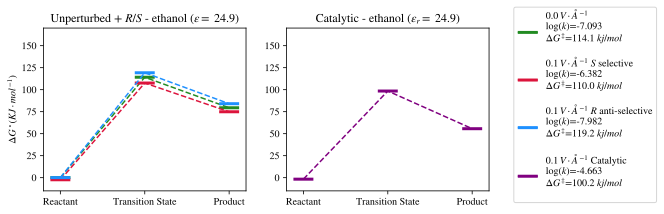

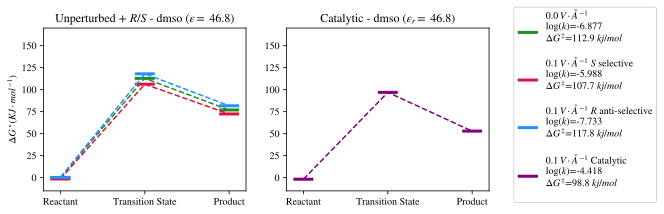

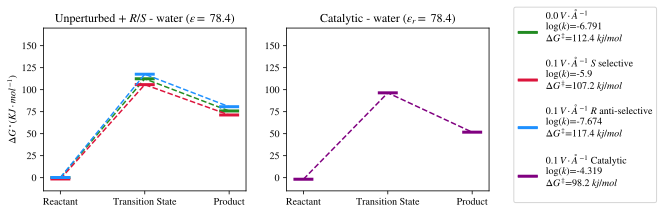

In [10]:
############################################### DIELECTRICS ###############################################
dielectrics = {"gas":      0.0000,
               "hexane":   2.0165,
               "dcm":      8.9300,
               "ethanol": 24.8520,
               "dmso":    46.8260,
               "water":   78.3553}

data = {}
bh_u = []
bh_c = []
bh_r = []
bh_s = []

r_u = []
r_c = []
r_r = []
r_s = []
t_u = []
t_c = []
t_r = []
t_s = []
p_u = []
p_c = []
p_r = []
p_s = []
dielectric_list = []

############################################### GAS ###############################################
rxn = {
    #                               E reac        E TS        E Prod      TS Freq
    '0.0 V/A':                  [-708.89249452, -708.83865784, -708.84050205, -473.58],
    '0.1 V/A Catalytic':        [-708.89012606, -708.83234835, -708.83353875, -488.02],
    '0.1 V/A Selective - (R)':  [-708.89194623, -708.83657141, -708.83732480, -472.30],
    '0.1 V/A Selective + (S)':  [-708.89677177, -708.84446619, -708.84610474, -473.58],
}

rxn['0.0 V/A']                 = [-708.89847215, -708.83843076, -708.84051927, -472.60]
rxn['0.1 V/A Catalytic']       = [-708.89822169, -708.84184484, -708.84563766, -434.69]
rxn['0.1 V/A Selective - (R)'] = [-708.89807537, -708.83657141, -708.83891577, -472.30]
rxn['0.1 V/A Selective + (S)'] = [-708.89839520, -708.83900419, -708.84000580, -472.70]
rxn2 = rxn

dielectric_list += [0.0]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]

ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    
    
data["gas"] = rxnrelative_relaxed

############################################### ETHANOL ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.92102933, -708.88254519, -708.89878065, -482.09],
    '0.1 V/A Catalytic':        [-708.91647423, -708.87394322, -708.88749869, -497.14],
    '0.1 V/A Selective - (R)':  [-708.92054886, -708.87933263, -708.89607055, -502.88],
    '0.1 V/A Selective + (S)':  [-708.92256394, -708.89182475, -708.91026105, -459.14],
}

rxn['0.0 V/A']                 = [-708.91617952, -708.87272132, -708.88592669, -482.10]
rxn['0.1 V/A Catalytic']       = [-708.91682610, -708.87867564, -708.89498403, -457.65]
rxn['0.1 V/A Selective - (R)'] = [-708.91616301, -708.87076916, -708.88416984, -486.67]
rxn['0.1 V/A Selective + (S)'] = [-708.91710705, -708.87521749, -708.88766394, -458.69]
rxn2 = rxn

dielectric_list += [24.9]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]


ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    

data["ethanol"] = rxnrelative_relaxed

############################################### WATER ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.91182756, -708.87412239, -708.89222369, -482.34],
    '0.1 V/A Catalytic':        [-708.90716771, -708.86541814, -708.88057475, -499.69],
    '0.1 V/A Selective - (R)':  [-708.91140715, -708.87100732, -708.88960018, -502.33],
    '0.1 V/A Selective + (S)':  [-708.91314132, -708.88324400, -708.90414011, -462.42],
}

rxn['0.0 V/A']                 = [-708.91681997, -708.87401960, -708.88795552, -481.96]
rxn['0.1 V/A Catalytic']       = [-708.91750876, -708.88010690, -708.89713164, -456.64]
rxn['0.1 V/A Selective - (R)'] = [-708.91676421, -708.87203945, -708.88610458, -486.57]
rxn['0.1 V/A Selective + (S)'] = [-708.91739954, -708.87655833, -708.88968011, -459.05]
rxn2 = rxn

dielectric_list += [78.4]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]


ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    

data["water"] = rxnrelative_relaxed

############################################### DMSO ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.91785599, -708.87631784, -708.88879384, -481.71],
    '0.1 V/A Catalytic':        [-708.91412646, -708.86808798, -708.87707436, -495.37],
    '0.1 V/A Selective - (R)':  [-708.91735641, -708.87236426, -708.88483998, -502.82],
    '0.1 V/A Selective + (S)':  [-708.92087626, -708.88550697, -708.90272956, -460.21],
}

rxn['0.0 V/A']                 = [-708.91662635, -708.87363965, -708.88732559, -480.16]
rxn['0.1 V/A Catalytic']       = [-708.91732151, -708.87970379, -708.89647586, -456.87]
rxn['0.1 V/A Selective - (R)'] = [-708.91652476, -708.87167154, -708.88550753, -486.00]
rxn['0.1 V/A Selective + (S)'] = [-708.91720685, -708.87617651, -708.88906587, -456.40]
rxn2 = rxn

dielectric_list += [46.8]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]


ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    

data["dmso"] = rxnrelative_relaxed

############################################### DCM ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.92390293, -708.88138848, -708.89270525, -482.64],
    '0.1 V/A Catalytic':        [-708.91991257, -708.87321515, -708.88241665, -497.54],
    '0.1 V/A Selective - (R)':  [-708.92333317, -708.87760193, -708.88905071, -501.61],
    '0.1 V/A Selective + (S)':  [-708.92747981, -708.89028327, -708.90214844, -460.57],
}

rxn['0.0 V/A']                 = [-708.91468379, -708.86969994, -708.8813147, -481.66]
rxn['0.1 V/A Catalytic']       = [-708.91526383, -708.87542083, -708.8900459, -460.69]
rxn['0.1 V/A Selective - (R)'] = [-708.91463222, -708.86787539, -708.8797100, -484.81]
rxn['0.1 V/A Selective + (S)'] = [-708.91569553, -708.87219310, -708.8830064, -462.14]
rxn2 = rxn

dielectric_list += [8.9]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]


ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    

data["dcm"] = rxnrelative_relaxed

############################################### HEXANE ###############################################
rxn = {
    #                               E reac        E TS        E Prod        TS Freq
    '0.0 V/A':                  [-708.91436906, -708.86578460, -708.87100341, -487.92],
    '0.1 V/A Catalytic':        [-708.91082911, -708.85850232, -708.86258369, -500.84],
    '0.1 V/A Selective - (R)':  [-708.91365842, -708.86228839, -708.86751887, -500.33],
    '0.1 V/A Selective + (S)':  [-708.91769140, -708.87328513, -708.87843166, -472.22],
}

rxn['0.0 V/A']                 = [-708.90643405, -708.85344181, -708.85871139, -489.29]
rxn['0.1 V/A Catalytic']       = [-708.90659854, -708.85766704, -708.86586779, -465.54]
rxn['0.1 V/A Selective - (R)'] = [-708.90612558, -708.85117928, -708.85731064, -487.68]
rxn['0.1 V/A Selective + (S)'] = [-708.90686937, -708.85528849, -708.85982900, -474.24]
rxn2 = rxn

dielectric_list += [2.0]
bh_u += [eh2kjmol(rxn['0.0 V/A'][1] - rxn['0.0 V/A'][0])]
bh_c += [eh2kjmol(rxn['0.1 V/A Catalytic'][1] - rxn['0.1 V/A Catalytic'][0])]
bh_r += [eh2kjmol(rxn['0.1 V/A Selective - (R)'][1] - rxn['0.1 V/A Selective - (R)'][0])]
bh_s += [eh2kjmol(rxn['0.1 V/A Selective + (S)'][1] - rxn['0.1 V/A Selective + (S)'][0])]
r_u += [rxn['0.0 V/A'][0] - rxn['0.0 V/A'][0]]
r_c += [rxn['0.1 V/A Catalytic'][0] - rxn['0.0 V/A'][0]]
r_r += [rxn['0.1 V/A Selective - (R)'][0] - rxn['0.0 V/A'][0]]
r_s += [rxn['0.1 V/A Selective + (S)'][0] - rxn['0.0 V/A'][0]]
t_u += [rxn['0.0 V/A'][1] - rxn['0.0 V/A'][1]]
t_c += [rxn['0.1 V/A Catalytic'][1] - rxn['0.0 V/A'][1]]
t_r += [rxn['0.1 V/A Selective - (R)'][1] - rxn['0.0 V/A'][1]]
t_s += [rxn['0.1 V/A Selective + (S)'][1] - rxn['0.0 V/A'][1]]
p_u += [rxn['0.0 V/A'][2] - rxn['0.0 V/A'][2]]
p_c += [rxn['0.1 V/A Catalytic'][2] - rxn['0.0 V/A'][2]]
p_r += [rxn['0.1 V/A Selective - (R)'][2] - rxn['0.0 V/A'][2]]
p_s += [rxn['0.1 V/A Selective + (S)'][2] - rxn['0.0 V/A'][2]]


ks = {}
rxnrelative_relaxed = {}
for i in rxn:
    rxn[i] = eh2kjmol(rxn[i])
    rxnrelative_relaxed[i] = rxn[i] - rxn["0.0 V/A"][0]

for i in rxnrelative_relaxed.keys():
    ks[i] = STTransmisisonCoeffiecnt(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], rxnrelative_relaxed[i][2], rxn2[i][3]/2625.5)
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1])]
    rxnrelative_relaxed[i] = list(rxnrelative_relaxed[i]) + [e2logk(rxnrelative_relaxed[i][0], rxnrelative_relaxed[i][1], k=ks[i])]
print(ks)
    

data["hexane"] = rxnrelative_relaxed


########################################## CALCULATE R/S SPLITS ###########################################
r_s_split_relaxed = {}
for i in data.keys():
    r = data[i]["0.1 V/A Selective + (S)"][0]-data[i]["0.1 V/A Selective - (R)"][0]
    ts = data[i]["0.1 V/A Selective + (S)"][1]-data[i]["0.1 V/A Selective - (R)"][1]
    p = data[i]["0.1 V/A Selective + (S)"][2]-data[i]["0.1 V/A Selective - (R)"][2]
    
    if r > 300:
        r = 0
    if ts > 300:
        ts = 0
    if p > 300:
        p = 0
    r_s_split_relaxed[i] = [round(r,2), round(ts,2), round(p,2)]
    
########################################## CALCULATE LOGK DIFFS ###########################################
logk_diff_relaxed = {}
for i in data.keys():
    r = data[i]["0.1 V/A Selective + (S)"][5]-data[i]["0.1 V/A Selective - (R)"][5]
    logk_diff_relaxed[i] = [round(r,2)]
    
########################################## CALCULATE CATALYTIC ###########################################
catalytic_relaxed = {}
for i in data.keys():
    r = data[i]['0.1 V/A Catalytic'][0]-data[i]['0.0 V/A'][0]
    ts = data[i]['0.1 V/A Catalytic'][1]-data[i]['0.0 V/A'][1]
    p = data[i]['0.1 V/A Catalytic'][2]-data[i]['0.0 V/A'][2]
    if r > 300:
        r = 0
    if ts > 300:
        ts = 0
    if p > 300:
        p = 0
    catalytic_relaxed[i] = [round(r,2), round(ts,2), round(p,2)]
    
########################################## CALCULATE LOGK DIFFS ###########################################
logk_catalytic_relaxed = {}
for i in data.keys():
    r = abs(data[i]['0.1 V/A Catalytic'][5]-data[i]['0.0 V/A'][5])
    logk_catalytic_relaxed[i] = [round(r,2)]
    
############################################### PLOT GRAPHS ###############################################
x = ["Reactant", "Transition State", "Product"]
for j in dielectrics.keys(): 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))

    ax1.plot(x, data[j]["0.0 V/A"][0:3], marker='_', markersize='20', color='forestgreen', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\Delta G^\ddag$={:0.1f} $kj/mol$\n".format(r"$0.0\:V\cdot\AA^{-1}$", data[j]["0.0 V/A"][5], data[j]["0.0 V/A"][1]-data[j]["0.0 V/A"][0]))
    ax1.plot(x, data[j]["0.1 V/A Selective + (S)"][0:3], marker='_', color='crimson', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\Delta G^\ddag$={:0.1f} $kj/mol$\n".format(r"$0.1\:V\cdot\AA^{-1}$ $\it{S}$ selective", data[j]["0.1 V/A Selective + (S)"][5], data[j]["0.1 V/A Selective + (S)"][1]-data[j]["0.1 V/A Selective + (S)"][0]))
    ax1.plot(x, data[j]["0.1 V/A Selective - (R)"][0:3], marker='_', color='dodgerblue', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\Delta G^\ddag$={:0.1f} $kj/mol$\n".format(r"$0.1\:V\cdot\AA^{-1}$ $\it{R}$ anti-selective", data[j]["0.1 V/A Selective - (R)"][5], data[j]["0.1 V/A Selective - (R)"][1]-data[j]["0.1 V/A Selective - (R)"][0]))
    ax1.set_ylabel(r'$\Delta G^\circ (KJ\cdot mol^{-1})$')
    titlestring = '$\it{R}$/$\it{S}$'
    ax1.set_title(r'Unperturbed + {} - {} ($\varepsilon=$ {})'.format(titlestring, j, round(dielectrics[j], 1)))
    ax1.set_ylim(-15, 170)
    ax1.set_xlim(-0.2, 2.2)

    i="0.1 V/A Catalytic"
    ax2.plot(x, data[j][i][0:3], marker='_', color='purple', markersize='20', linestyle='--', mew=3, label="{}\n$\log(k)$={}\n$\Delta G^\ddag$={:0.1f} $kj/mol$\n".format(r"$0.1\:V\cdot\AA^{-1}$ Catalytic", data[j][i][5], data[j][i][1]-data[j][i][0]))
    ax2.set_title(r'Catalytic - {} ($\varepsilon_r=$ {})'.format(j, round(dielectrics[j], 1)))
    ax2.set_ylim(-15, 170)
    ax1.set_xlim(-0.2, 2.2)
    ax2.set_xlim(-0.2, 2.2)


    fig.legend(bbox_to_anchor=(1.2, 1))

    plt.show()

In [11]:
r_u = eh2kjmol(r_u)
r_c = eh2kjmol(r_c)
r_r = eh2kjmol(r_r)
r_s = eh2kjmol(r_s)
t_u = eh2kjmol(t_u)
t_c = eh2kjmol(t_c)
t_r = eh2kjmol(t_r)
t_s = eh2kjmol(t_s)
p_u = eh2kjmol(p_u)
p_c = eh2kjmol(p_c)
p_r = eh2kjmol(p_r)
p_s = eh2kjmol(p_s)

r_u_reordered = [] 
r_c_reordered = [] 
r_r_reordered = [] 
r_s_reordered = [] 
t_u_reordered = [] 
t_c_reordered = [] 
t_r_reordered = [] 
t_s_reordered = [] 
p_u_reordered = [] 
p_c_reordered = [] 
p_r_reordered = [] 
p_s_reordered = [] 

reorder_list = [0, 5, 4, 1, 3, 2]
dielectric_list_reordered = []
bh_u_reordered = []
bh_c_reordered = []
bh_r_reordered = []
bh_s_reordered = []
for i in reorder_list:
    dielectric_list_reordered += [dielectric_list[i]]
    bh_u_reordered += [bh_u[i]]
    bh_c_reordered += [bh_c[i]]
    bh_r_reordered += [bh_r[i]]
    bh_s_reordered += [bh_s[i]]
    r_u_reordered += [r_u[i]]
    r_c_reordered += [r_c[i]]
    r_r_reordered += [r_r[i]]
    r_s_reordered += [r_s[i]]
    t_u_reordered += [t_u[i]]
    t_c_reordered += [t_c[i]]
    t_r_reordered += [t_r[i]]
    t_s_reordered += [t_s[i]]
    p_u_reordered += [p_u[i]]
    p_c_reordered += [p_c[i]]
    p_r_reordered += [p_r[i]]
    p_s_reordered += [p_s[i]]
    

bh_u_reduced = np.subtract(bh_u_reordered, max(bh_u_reordered)) 
bh_c_reduced = np.subtract(bh_c_reordered, max(bh_c_reordered)) 
bh_r_reduced = np.subtract(bh_r_reordered, max(bh_r_reordered)) 
bh_s_reduced = np.subtract(bh_s_reordered, max(bh_s_reordered)) 

bh_c_diff = np.subtract(bh_c_reduced, bh_u_reduced)
bh_r_diff = np.subtract(bh_r_reduced, bh_u_reduced)
bh_s_diff = np.subtract(bh_s_reduced, bh_u_reduced)

bh_c_diff2 = np.subtract(bh_u_reordered, bh_c_reordered)
bh_r_diff2 = np.subtract(bh_u_reordered, bh_r_reordered)
bh_s_diff2 = np.subtract(bh_u_reordered, bh_s_reordered)



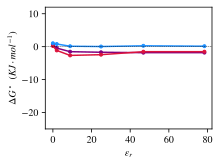

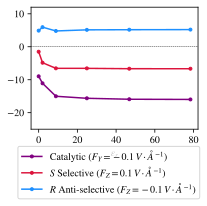

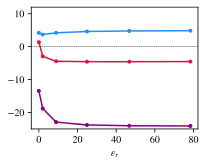

In [12]:
fig, ax1 = plt.subplots(1,1, figsize=(3,3*.75))
fig, ax2 = plt.subplots(1,1, figsize=(3,3*.75))
fig, ax3 = plt.subplots(1,1, figsize=(3,3*.75))
# ax1.plot(dielectric_list_reordered, r_u_reordered, marker='.', label=r"Unperturbed", color='g')
ax1.plot(dielectric_list_reordered, r_c_reordered, marker='.', label=r"Catalytic", color='purple')
ax1.plot(dielectric_list_reordered, r_s_reordered, marker='.', label=r"$S$ Selective", color='crimson')
ax1.plot(dielectric_list_reordered, r_r_reordered, marker='.', label=r"$R$ Anti-selective", color='dodgerblue')
# ax2.plot(dielectric_list_reordered, t_u_reordered, marker='.', label=r"Unperturbed", color='g')
ax2.plot(dielectric_list_reordered, t_c_reordered, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax2.plot(dielectric_list_reordered, t_s_reordered, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax2.plot(dielectric_list_reordered, t_r_reordered, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
# ax3.plot(dielectric_list_reordered, p_u_reordered, marker='.', label=r"Unperturbed", color='g')
ax3.plot(dielectric_list_reordered, p_c_reordered, marker='.', label=r"Catalytic", color='purple')
ax3.plot(dielectric_list_reordered, p_s_reordered, marker='.', label=r"$S$ Selective", color='crimson')
ax3.plot(dielectric_list_reordered, p_r_reordered, marker='.', label=r"$R$ Anti-selective", color='dodgerblue')
# ax1.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta G^\circ$  ($KJ\cdot mol^{-1}$)")
ax2.set_xlabel(r"$\varepsilon_r$")
# ax2.set_ylabel(r"$\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
ax3.set_xlabel(r"$\varepsilon_r$")
# ax3.set_ylabel(r"$\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
ax1.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax2.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax3.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax2.legend(bbox_to_anchor=(1.04, -0.1))
ax1.set_ylim(-25, 12)
ax2.set_ylim(-25, 12)
ax3.set_ylim(-25, 12)
plt.show()

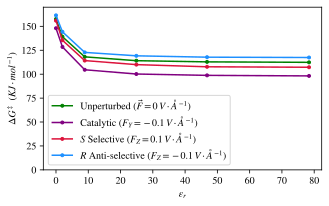

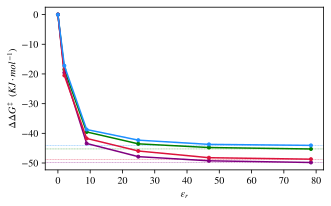

[  0.         -19.54776643 -43.40962318 -47.85338694 -49.25209582
 -49.81883624]


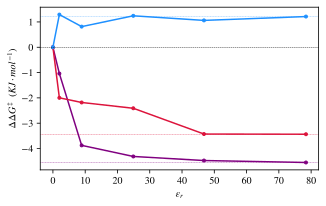

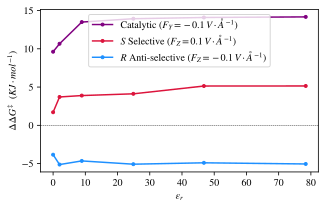

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectric_list_reordered, bh_u_reordered, marker='.', label=r"Unperturbed ($\vec F=0\:V\cdot\AA^{-1}$)", color='g')
ax1.plot(dielectric_list_reordered, bh_c_reordered, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectric_list_reordered, bh_s_reordered, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectric_list_reordered, bh_r_reordered, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
# ax1.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(0, 170)
ax1.legend()
plt.show()




fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.axhline(min(bh_u_reduced), linewidth=0.3, linestyle='--', color='g')
ax1.axhline(min(bh_c_reduced), linewidth=0.3, linestyle='--', color='purple')
ax1.axhline(min(bh_s_reduced), linewidth=0.3, linestyle='--', color='crimson')
ax1.axhline(min(bh_r_reduced), linewidth=0.3, linestyle='--', color='dodgerblue')
ax1.plot(dielectric_list_reordered, bh_u_reduced, marker='.', label=r"Unperturbed ($\vec F=0\:V\cdot\AA^{-1}$)", color='g')
ax1.plot(dielectric_list_reordered, bh_c_reduced, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectric_list_reordered, bh_s_reduced, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectric_list_reordered, bh_r_reduced, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')

ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
# ax1.legend()
plt.show()
print(bh_c_reduced)



fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.axhline(min(bh_c_diff), linewidth=0.3, linestyle='--', color='purple')
ax1.axhline(min(bh_s_diff), linewidth=0.3, linestyle='--', color='crimson')
ax1.axhline(bh_r_diff[-1], linewidth=0.3, linestyle='--', color='dodgerblue')
ax1.plot(dielectric_list_reordered, bh_c_diff, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectric_list_reordered, bh_s_diff, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectric_list_reordered, bh_r_diff, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
ax1.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
# ax1.legend(bbox_to_anchor=(0.3, 0.48))
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectric_list_reordered, bh_c_diff2, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectric_list_reordered, bh_s_diff2, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectric_list_reordered, bh_r_diff2, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
ax1.axhline(0, linewidth=0.4, linestyle='--', color='k')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta G^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
ax1.legend()
plt.show()

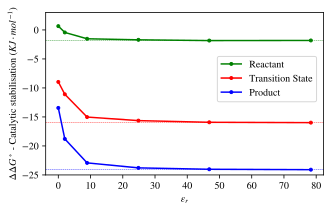

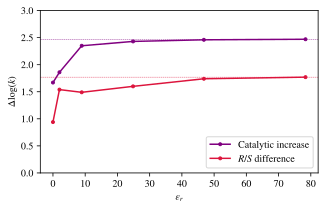

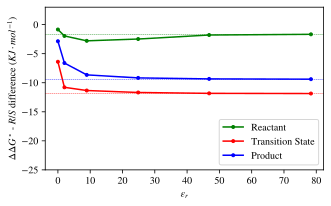

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
fig, ax2 = plt.subplots(1,1, figsize=(5,3))
fig, ax3 = plt.subplots(1,1, figsize=(5,3))
labels = ["Reactant", "TS", "Product"]
for j in range(0,3):
    x = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    for i in dielectrics.keys():
        x += [dielectrics[i]]
        y2 += [catalytic_relaxed[i][j]]
        y3 += [logk_catalytic_relaxed[i][0]]
        y4 += [r_s_split_relaxed[i][j]]
        y5 += [logk_diff_relaxed[i][0]]
    if j == 0:
        # ax1.plot(x, y1, label="satic", marker=".")
        ax1.plot(x, y2, label="Reactant", marker=".", color='g')
        ax1.axhline(min(y2), linewidth=0.4, linestyle='--', color='g')
        ax3.plot(x, y4, label="Reactant", marker=".", color='g')
        ax3.axhline(y4[-1], linewidth=0.4, linestyle='--', color='g')
    if j == 1:
        # ax2.plot(x, y1, label="satic", marker=".")
        ax1.plot(x, y2, label="Transition State", marker=".", color='r')
        ax1.axhline(min(y2), linewidth=0.4, linestyle='--', color='r')
        ax3.plot(x, y4, label="Transition State", marker=".", color='r')
        ax3.axhline(min(y4), linewidth=0.4, linestyle='--', color='r')
    if j == 2:
        # ax3.plot(x, y1, label="satic", marker=".")
        ax1.plot(x, y2, label="Product", marker=".", color='b')
        ax1.axhline(min(y2), linewidth=0.4, linestyle='--', color='b')
        ax3.plot(x, y4, label="Product", marker=".", color='b')
        ax3.axhline(min(y4), linewidth=0.4, linestyle='--', color='b')

# ax1.set_title("R/S Separation")

ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r'$\Delta\Delta G^\circ$ - Catalytic stabilisation $(KJ\cdot mol^{-1})$')
ax3.set_ylabel(r'$\Delta\Delta G^\circ$ - $\it{R}$/$\it{S}$ difference $(KJ\cdot mol^{-1})$')
ax3.set_xlabel(r"$\varepsilon_r$")
ax2.plot(x, y3, marker=".", color='purple', label='Catalytic increase')
ax2.plot(x, y5, marker=".", color='crimson', label=r'$\it{R}$/$\it{S}$ difference')
ax2.legend()
ax2.axhline(max(y3), linewidth=0.4, linestyle='--', color='purple')
ax2.axhline(y5[-1], linewidth=0.4, linestyle='--', color='crimson')
ax1.set_ylim(-25, 3)
ax3.set_ylim(-25, 3)
# ax2.set_title(r"R/S $\Delta(\log(k) + Tunnelling)$")
ax2.set_ylabel(r"$\Delta\log(k)$")
ax2.set_xlabel(r"$\varepsilon_r$")
ax2.set_ylim(0, 3)
ax1.legend(bbox_to_anchor=(0.6, 0.42))
ax2.legend(loc='lower right')
ax3.legend(loc='lower right')
# plt.subplots_adjust(wspace=0.4)

plt.show()

In [15]:
print("F_y Static Gas")
# r = [-708.89425466, -708.89478272, -708.89664488, -708.89710739, -708.89744097, -708.89785612, -708.89788218, -708.89883637, -708.89866268, -708.89883397, -708.89930601, 0, 0]
# t = [-708.82603921, -708.82809262, -708.83032637, -708.83271470, -708.83526287, -708.83763149, -708.83763268, -708.83978996, -708.84192048, -708.84388563, -708.84074477, -708.84329280, -708.84594206]
# p = [-708.82643338, -708.82887799, -708.83132437, -708.83384141, -708.83642884, -708.83909889, -708.83910027, -708.84185335, -708.84418114, -708.84649469, -708.84882620, -708.85116297, -708.85347337]
# freq = [-497.86, -495.20, -491.83, -486.79, -480.04, -474.98, -474.44, -468.93, -464.76, -459.84, -58.19, -65.27, -71.02]
r = [-709.138329336929, -709.134510713161, -709.130897850940, -709.127490424066, -709.124288147836, -709.121290778183, -709.118498110500, -709.115909978633, -709.113526255368, -709.111346850064, -709.109371709830, -709.107600819200, -709.106034199810, -709.104671910332, -709.103514046529, -709.102560742443, -709.101812169456, -709.101268538005, -709.100930097748, -709.100797138557, -709.100869991528, -709.101149030384, -709.101634672749, -709.102327382185, -709.103227669719, -709.104336096938, -709.105653278486, -709.107179885572, -709.108916649755, -709.110864368371]
t = [-709.116720943873, -709.110485169434, -709.104454994299, -709.098630453244, -709.093011631566, -709.087598663644, -709.082391732388, -709.077391069090, -709.072596952589, -709.068009710639, -709.063629719380, -709.059457404876, -709.055493243652, -709.051737764782, -709.048191551229, -709.044855243006, -709.041729539145, -709.038815201151, -709.036113057476, -709.033624007923, -709.031349029212, -709.029289181213, -709.027445615028, -709.025819582508, -709.024412446746, -709.023225696262, -709.022260961719, -709.021520038143, -709.021004913278, -709.020717807818]
p = [-709.126436961887, -709.119844051518, -709.113452795561, -709.107263170449, -709.101275199836, -709.095488954586, -709.089904552709, -709.084522159761, -709.079341990075, -709.074364307460, -709.069589427291, -709.065017718619, -709.060649606162, -709.056485574351, -709.052526170734, -709.048772011183, -709.045223785480, -709.041882264711, -709.038748310004, -709.035822883658, -709.033107062480, -709.030602056220, -709.028309229195, -709.026230131681, -709.024366539743, -709.022720513273, -709.021294480677, -709.020091366095, -709.019114798290, -709.018369469185]

F_y Static Gas


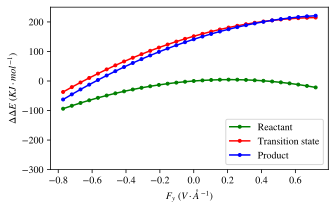

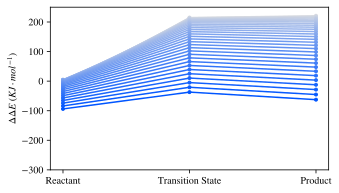

In [16]:
fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]
transmission = []
rate = []
fields = np.multiply(fields, 51.4220674763)
colours = list(reversed(range(1, len(fields)+1)))
colours = np.divide(colours, max(colours))
# colours = np.multiply(colours, 0.8)
# colours = np.add(colours, 0.2)
colourlist = []

for i in range(len(colours)):
    s = colours[i]
    red, green, blue = colorsys.hsv_to_rgb(220/360, s, (s/8)+0.875)
    # red, green, blue = colorsys.hsv_to_rgb(200/360, s, 1)
    colourlist += [(red, green, blue)]


# np.subtract(t, t[6])
# np.subtract(p, p[6])
t = np.subtract(t, r[15])
p = np.subtract(p, r[15])
r = np.subtract(r, r[15])
# r = np.subtract(r, -708.89976333)
# t = np.subtract(t, -708.89976333)
# p = np.subtract(p, -708.89976333)    

r = list(eh2kjmol(r))
t = list(eh2kjmol(t))
p = list(eh2kjmol(p))

# del r[6]
# del t[6]
# del p[6]
# del freq[6]
try:
    del transmission[6]
except:
    pass

# try:
#     del rate[6]
# except:
#     pass

bh_g = np.subtract(t, r)


for i in range(len(r)):
    # transmission += [STTransmisisonCoeffiecnt(r[i], t[i], p[i], freq[i])]
    rate += [e2logk(r[i], t[i])]

for i in range(len(rate)):
    if rate[i] != rate[i]:
        rate[i] = 0
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(fields, r, marker='.', label="Reactant", color='g')
ax1.plot(fields, t, marker='.', label="Transition state", color='r')
ax1.plot(fields, p, marker='.', label="Product", color='b')
ax1.set_xlabel(r"$F_y$ ($V\cdot \AA^{-1}$)")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
ax1.legend(loc='lower right')
plt.show()

fig, ax1 = plt.subplots(1,1, figsize=(5,3))

# ax1.set_title("Relative energy of the reactant, transition state and product as a function\nof catalytic field strength")
# ax1.plot(fields, r, marker='.', label="Reactant")
# ax1.plot(fields, t, marker='.', label="Transition State")
# ax1.plot(fields, p, marker='.', label="Product")
x = ["Reactant", "Transition State", "Product"]
for i in reversed(range(len(r))):
    ax1.plot(x, [r[i], t[i], p[i]], marker='.', color=colourlist[i], label="field: {}\nBarrier: {}\nRate {}".format(fields[i], round(t[i]-r[i]), rate[i]))
    
 
# ax1.set_xlabel(r"Reaction coordinate")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
# ax1.legend(bbox_to_anchor=(2.7, 1.4))
ax1.set_ylim(-300, 250)

# ax2.plot(fields, bh_g, marker='.')
# ax2.set_xlabel(r"$F_y$ ($V\cdot \AA^{-1}$)")
# ax2.set_ylabel(r"$\Delta E^\ddag$ ($KJ\cdot mol^{-1}$)")
plt.show()

F_y Static Ethanol


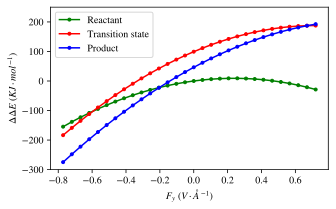

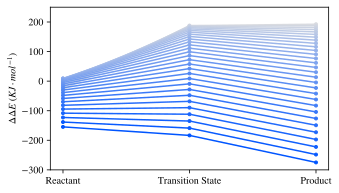

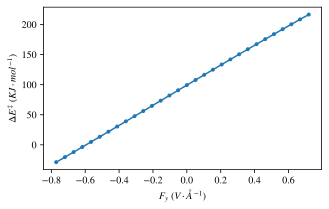

164.5401900480939


In [17]:
print("F_y Static Ethanol")
# r = [-708.91882837, -708.91987138, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# t = [-708.86466934, -708.86759928, -708.87114225, -708.87433160, -708.87763227, -708.88089789, -708.88087097, -708.88410924, -708.88747691, -708.89102869, -708.89468533, -708.89843584, -708.90227968]
# p = [-708.87744703, -708.88063995, -708.88382220, -708.88699240, -708.89061463, -708.89671935, -708.89672036, -708.90090823, 0, 0, 0, 0, 0]
# freq = [-519.14, -513.32, -507.04, -500.07, -492.22, -486.27, -487.31, -479.79, -474.88, -469.63, -464.58, -458.85, -453.01]
p = [-709.2319367878271, -709.2217976326671, -709.211942456282, -709.202370390039, -709.193081708477, -709.1840765313821, -709.175354697485, -709.166914009888, -709.158755812514, -709.1508798982501, -709.1432867580301, -709.135977200863, -709.128951504812, -709.12220970934, -709.1157529987689, -709.109582006547, -709.103697491737, -709.0980994762999, -709.092789965191, -709.087770289051, -709.083041818875, -709.078605885911, -709.074464386518, -709.070619143434, -709.067072878059, -709.063829235396, -709.0608902405339, -709.058259067043, -709.0559400586139, -709.053938456344]
r = [-709.18615587379, -709.17993221322, -709.174041185955, -709.168482327163, -709.163252960206, -709.158351934453, -709.1537781939561, -709.1495315880541, -709.145611124762, -709.1420160339931, -709.138744523106, -709.135796582307, -709.1331715614119, -709.1308690382549, -709.128889266117, -709.127232103373, -709.12589735339, -709.1248853455529, -709.124196537085, -709.123831255274, -709.123790501735, -709.1240749966471, -709.1246855660919, -709.125623769503, -709.126890619983, -709.1284875468559, -709.13041618185, -709.1326788288981, -709.1352779303149, -709.138216149331]
t = [-709.197140011484, -709.187728183251, -709.17863567213, -709.169861244114, -709.161404024187, -709.1532646872281, -709.145443291419, -709.137939954059, -709.13075467998, -709.123887931502, -709.117341050229, -709.111114240202, -709.105208002834, -709.099625042927, -709.094366775816, -709.089433896602, -709.084828731219, -709.0805523374311, -709.076607131273, -709.072994332447, -709.069716694303, -709.066776246736, -709.064175042524, -709.061916258333, -709.060003200751, -709.05843874016, -709.057226271271, -709.056369875404, -709.055874046952, -709.055744219266]

fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]

transmission = []
rate = []

fields = np.multiply(fields, 51.4220674763)

colours = list(reversed(range(1, len(fields)+1)))
colours = np.divide(colours, max(colours))
# colours = np.multiply(colours, 0.8)
# colours = np.add(colours, 0.2)
colourlist = []

for i in range(len(colours)):
    s = colours[i]
    red, green, blue = colorsys.hsv_to_rgb(220/360, s, (s/8)+0.875)
    # red, green, blue = colorsys.hsv_to_rgb(200/360, s, 1)
    colourlist += [(red, green, blue)]



# np.subtract(t, t[6])
# np.subtract(p, p[6])
t = np.subtract(t, r[15])
p = np.subtract(p, r[15])
r = np.subtract(r, r[15])
# r = np.subtract(r, -708.89976333)
# t = np.subtract(t, -708.89976333)
# p = np.subtract(p, -708.89976333)

r = list(eh2kjmol(r))
t = list(eh2kjmol(t))
p = list(eh2kjmol(p))

# del r[6]
# del t[6]
# del p[6]
# del freq[6]
try:
    del transmission[6]
except:
    pass

# try:
#     del rate[6]
# except:
#     pass

bh = np.subtract(t, r)

for i in range(len(r)):
    # transmission += [STTransmisisonCoeffiecnt(r[i], t[i], p[i], freq[i])]
    rate += [e2logk(r[i], t[i])]

for i in range(len(rate)):
    if rate[i] != rate[i]:
        rate[i] = 0

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(fields, r, marker='.', label="Reactant", color='g')
ax1.plot(fields, t, marker='.', label="Transition state", color='r')
ax1.plot(fields, p, marker='.', label="Product", color='b')
ax1.set_xlabel(r"$F_y$ ($V\cdot \AA^{-1}$)")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
ax1.legend()
plt.show()
        
fig, ax1 = plt.subplots(1,1, figsize=(5,3))

# ax1.set_title("Relative energy of the reactant, transition state and product as a function\nof catalytic field strength, solvated in SMD ethanol")
# ax1.plot(fields, r, marker='.', label="Reactant")
# ax1.plot(fields, t, marker='.', label="Transition State")
# ax1.plot(fields, p, marker='.', label="Product")
x = ["Reactant", "Transition State", "Product"]
for i in reversed(range(len(r))):
    ax1.plot(x, [r[i], t[i], p[i]], marker='.', color=colourlist[i], label="field: {}\nBarrier: {}\nRate {}".format(fields[i], round(t[i]-r[i]), rate[i]))
 
# ax1.set_xlabel(r"Reaction coordinate")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
# ax1.legend(bbox_to_anchor=(2.7, 1.4))
ax1.set_ylim(-300, 250)

# ax2.set_title("Reaction rate constant as a function\nof catalytic field strength")
# ax2.plot(fields, rate, marker='.')
# ax2.set_xlabel(r"$F_y$ ($V\cdot \AA^{-1}$)")
# ax2.set_ylabel(r"Reaction rate ($log(k)$)")

# ax2.set_title("Barrier height as a function\nof catalytic field strength")
fig, ax2 = plt.subplots(1,1, figsize=(5,3))
ax2.plot(fields, bh, marker='.', label="Ethanol")
# ax2.plot(fields, bh_g, marker='.', label="Vacuum")
# ax2.legend(loc='lower right')
ax2.set_xlabel(r"$F_y$ ($V\cdot \AA^{-1}$)")
ax2.set_ylabel(r"$\Delta E^\ddag$ ($KJ\cdot mol^{-1}$)")
plt.show()


dbh_df = []
fields, bh,

for i in range(len(fields)):
    if i == 0:
        field = fields[i]
        barrier = bh[i]
    else:
        fields, bh,
        dbh_df += [(barrier-bh[i])/(field-fields[i])]
        field = fields[i]
        barrier = bh[i]
        
print(np.average(dbh_df))

F_z Static Gas


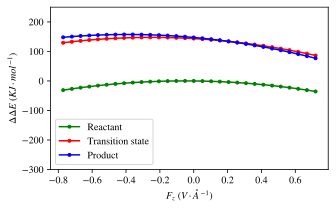

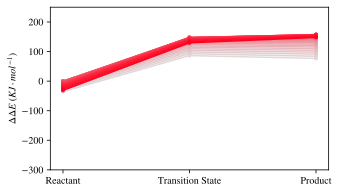

In [18]:
print("F_z Static Gas")
p = [-709.04594975993, -709.045016559587, -709.044222392349, -709.043565974748, -709.043046195365, -709.042662084786, -709.042412794759, -709.042297580719, -709.042315787959, -709.042466841745, -709.042750237449, -709.043165534591, -709.043712350578, -709.044390355397, -709.045199268412, -709.046138854618, -709.047208922299, -709.048409320403, -709.04973993664, -709.051200696247, -709.052791560567, -709.054512526908, -709.056363626234, -709.058344924288, -709.060456520888, -709.062698549253, -709.065071177014, -709.067574606072, -709.070209073248, -709.072974850956]
r = [-709.114109832837, -709.11246761723, -709.110948197567, -709.109551250199, -709.108276483413, -709.107123636428, -709.106092477565, -709.105182804253, -709.104394441878, -709.103727242982, -709.103181081565, -709.10275587943, -709.102451552302, -709.102268063081, -709.102205394608, -709.10226355578, -709.102442580496, -709.102742528232, -709.103163484901, -709.103705561727, -709.104368896573, -709.105153654244, -709.106060027078, -709.107088235417, -709.108238528691, -709.109511186591, -709.110906519567, -709.112424870571, -709.114066616698, -709.11583217067]
t = [-709.052940126191, -709.05164535943, -709.050486378335, -709.0494625805, -709.048573426076, -709.04781843192, -709.04719716682, -709.046709247816, -709.04635433517, -709.04613213194, -709.046042379703, -709.046084857423, -709.046259379407, -709.046565794261, -709.047003983005, -709.047573859159, -709.048275367189, -709.049108482025, -709.050073208638, -709.051169582303, -709.052397667538, -709.053757558928, -709.05524938079, -709.056873287609, -709.058629464427, -709.060518127613, -709.062539525066, -709.064693937892, -709.066981680635, -709.069403103353]
 
 
 

fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]

transmission = []
rate = []

fields = np.multiply(fields, 51.4220674763)

colours = list(reversed(range(1, len(fields)+1)))
colours = np.divide(colours, max(colours))
# colours = np.multiply(colours, 0.8)
# colours = np.add(colours, 0.2)
colourlist = []

for i in range(len(colours)):
    s = colours[i]
    red, green, blue = colorsys.hsv_to_rgb(353/360, s, (s/8)+0.875)
    # red, green, blue = colorsys.hsv_to_rgb(200/360, s, 1)
    colourlist += [(red, green, blue)]

t = np.subtract(t, r[15])
p = np.subtract(p, r[15])
r = np.subtract(r, r[15])

r = list(eh2kjmol(r))
t = list(eh2kjmol(t))
p = list(eh2kjmol(p))

bh_g = np.subtract(t, r)
sep_g = np.subtract(bh_g, bh_g[::-1])

for i in range(len(r)):
    rate += [e2logk(r[i], t[i])]

for i in range(len(rate)):
    if rate[i] != rate[i]:
        rate[i] = 0

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(fields, r, marker='.', label="Reactant", color='g')
ax1.plot(fields, t, marker='.', label="Transition state", color='r')
ax1.plot(fields, p, marker='.', label="Product", color='b')
ax1.set_xlabel(r"$F_z$ ($V\cdot \AA^{-1}$)")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
ax1.legend()
plt.show()
        
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
x = ["Reactant", "Transition State", "Product"]
for i in reversed(range(len(r))):
    ax1.plot(x, [r[i], t[i], p[i]], marker='.', color=colourlist[i], label="field: {}\nBarrier: {}\nRate {}".format(fields[i], round(t[i]-r[i]), rate[i]))
 
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
plt.show()

F_z Static Ethanol


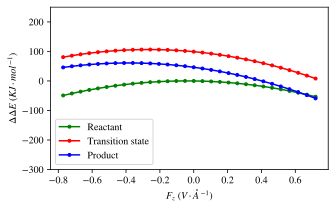

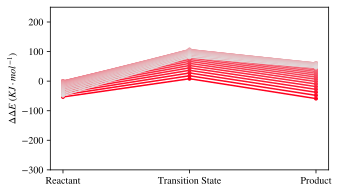

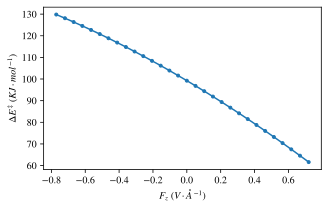

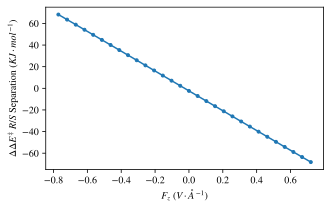

-91.47662361832296


In [19]:
print("F_z Static Ethanol")
p = [-709.109766966292, -709.1083312461869, -709.107104040472, -709.106083731955, -709.1052692926361, -709.104658361484, -709.104250209267, -709.104044168458, -709.1040393770489, -709.104234655995, -709.1046294176571, -709.105223317622, -709.1060158877859, -709.107006670319, -709.108195513105, -709.1095819964071, -709.11116552906, -709.112945578011, -709.114922525603, -709.117096209491, -709.1194669318589, -709.1220356106791, -709.124802200562, -709.127767033746, -709.130930513242, -709.1342929451071, -709.137854372818, -709.1416151012669, -709.1455778125389, -709.14974252269]
r = [-709.145945733764, -709.14338775, -709.14101952495, -709.138839792027, -709.136847970094, -709.135043788565, -709.133426880897, -709.131996640781, -709.130752278448, -709.129693767201, -709.128820841143, -709.12813308305, -709.127630162028, -709.1273122630889, -709.127179555662, -709.127232113565, -709.1274702944601, -709.12789396109, -709.128503241085, -709.129298879024, -709.130281027033, -709.1314499886021, -709.132806269819, -709.134350132753, -709.136083040762, -709.138005832325, -709.1401194165641, -709.142424480964, -709.144921948625, -709.1476122883261]
t = [-709.096504209997, -709.0945954391191, -709.092895372623, -709.0914031804949, -709.090117548892, -709.089037262825, -709.0881622426219, -709.087492032647, -709.087025311704, -709.086761846433, -709.086700954325, -709.0868424195969, -709.0871864985111, -709.0877332666751, -709.088482456778, -709.089433896784, -709.090587928698, -709.091943908994, -709.093502287607, -709.095263609552, -709.097228735872, -709.099397595646, -709.101770418744, -709.104347438726, -709.1071295371751, -709.110117768402, -709.1133131554959, -709.116715837181, -709.120327436092, -709.124149358399]
 
 
 

fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]

transmission = []
rate = []

fields = np.multiply(fields, 51.4220674763)

colours = list(reversed(range(1, len(fields)+1)))
colours = np.divide(colours, max(colours))
colourlist = []

for i in reversed(range(len(colours))):
    s = colours[i]
    red, green, blue = colorsys.hsv_to_rgb(353/360, s, (s/8)+0.875)
    colourlist += [(red, green, blue)]

t = np.subtract(t, r[15])
p = np.subtract(p, r[15])
r = np.subtract(r, r[15])
r = list(eh2kjmol(r))
t = list(eh2kjmol(t))
p = list(eh2kjmol(p))

bh = np.subtract(t, r)

sep = np.subtract(bh, bh[::-1])

for i in range(len(r)):
    rate += [e2logk(r[i], t[i])]

for i in range(len(rate)):
    if rate[i] != rate[i]:
        rate[i] = 0

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(fields, r, marker='.', label="Reactant", color='g')
ax1.plot(fields, t, marker='.', label="Transition state", color='r')
ax1.plot(fields, p, marker='.', label="Product", color='b')
ax1.set_xlabel(r"$F_z$ ($V\cdot \AA^{-1}$)")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
ax1.legend()
plt.show()
        
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
x = ["Reactant", "Transition State", "Product"]
for i in reversed(range(len(r))):
    ax1.plot(x, [r[i], t[i], p[i]], marker='.', color=colourlist[i], label="field: {}\nBarrier: {}\nRate {}".format(fields[i], round(t[i]-r[i]), rate[i]))
 
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-300, 250)
 
fig, ax2 = plt.subplots(1,1, figsize=(5,3))
ax2.plot(fields, bh, marker='.', label="Ethanol")
# ax2.plot(fields, bh_g, marker='.', label="Vacuum")
# ax2.legend(loc='upper right')
ax2.set_xlabel(r"$F_z$ ($V\cdot \AA^{-1}$)")
ax2.set_ylabel(r"$\Delta E^\ddag$ ($KJ\cdot mol^{-1}$)")
plt.show()

fig, ax2 = plt.subplots(1,1, figsize=(5,3))
ax2.plot(fields, sep, marker='.', label="Ethanol")
# ax2.plot(fields, sep_g, marker='.', label="Vacuum")
# ax2.legend(loc='upper right')
ax2.set_xlabel(r"$F_z$ ($V\cdot \AA^{-1}$)")
ax2.set_ylabel(r"$\Delta\Delta E^\ddag$ $\it{R}$/$\it{S}$ Separation ($KJ\cdot mol^{-1}$)")
plt.show()

dbh_df = []

for i in range(len(fields)):
    if i == 0:
        field = fields[i]
        barrier = sep[i]
    else:
        dbh_df += [(barrier-sep[i])/(field-fields[i])]
        field = fields[i]
        barrier = sep[i]
        
print(np.average(dbh_df))

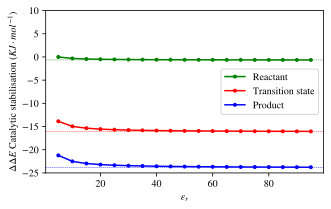

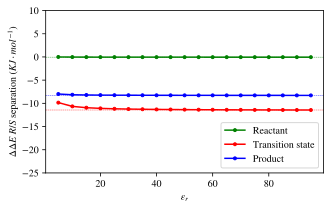

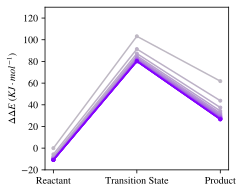

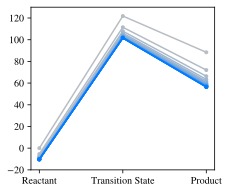

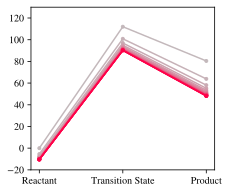

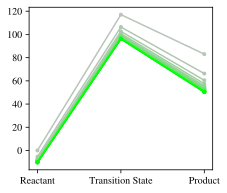

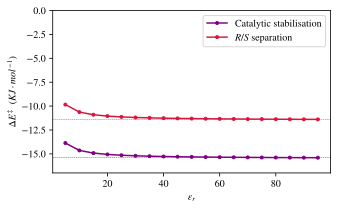

In [20]:
p_c = [-709.093552277507, -709.100423704883, -709.102822987389, -709.1040442604981, -709.1047841221271, -709.105280365029, -709.105636295573, -709.105904068266, -709.106112821986, -709.106280124856, -709.106417221477, -709.106531597496, -709.1066284845309, -709.1067116009369, -709.106783691846, -709.106846814122, -709.106902534387, -709.1069520931591, -709.106996454792]
r_c = [-709.117093952368, -709.1192535785, -709.119992953081, -709.1203664902389, -709.1205918634761, -709.120742640902, -709.120850604077, -709.120931718202, -709.12099488614, -709.121045480143, -709.121086911053, -709.1211214569349, -709.121150713292, -709.121175799486, -709.121197547335, -709.121216583768, -709.1212333904181, -709.121248335264, -709.1212617081329]
t_c = [-709.077787896562, -709.082279844691, -709.083854483029, -709.084657332272, -709.0851441584559, -709.08547086696, -709.085705298673, -709.085881721644, -709.0860192892341, -709.086129567252, -709.086219937044, -709.086295344872, -709.0863592304061, -709.086414047069, -709.0864615831, -709.086503211428, -709.086539961339, -709.086572653825, -709.086601922202]
p_r = [-709.0828364482151, -709.089076407836, -709.091254840874, -709.0923636231649, -709.093035321256, -709.093485821549, -709.093808957489, -709.094052042842, -709.09424154674, -709.0943934351869, -709.0945178851749, -709.094621722539, -709.0947096668709, -709.094785128793, -709.0948505644141, -709.094907864395, -709.0949584525009, -709.095003438151, -709.0950437076]
r_r = [-709.116508113826, -709.118568690831, -709.119272380439, -709.119627517029, -709.1198416757741, -709.11998489929, -709.120087430263, -709.1201644484271, -709.120224420548, -709.120272438326, -709.12031176935, -709.120344558677, -709.120372320014, -709.1203961218009, -709.120416767712, -709.120434826402, -709.1204507781821, -709.1204649534, -709.120477638519]
t_r = [-709.070105080369, -709.074042079308, -709.0754204863489, -709.076122974754, -709.076548857775, -709.076834624033, -709.077039663793, -709.077193941741, -709.077314246337, -709.0774106831219, -709.077489703429, -709.077555645695, -709.077611507228, -709.0776594285339, -709.077700995417, -709.077737394517, -709.077769526176, -709.077798112137, -709.077823696618]
p_s = [-709.0864259769891, -709.092725094772, -709.09492320071, -709.0960418287231, -709.09671942907, -709.0971738714541, -709.097499813637, -709.097745017338, -709.097936160698, -709.098089358848, -709.0982148848959, -709.098319617361, -709.098408329752, -709.098484434463, -709.098550440795, -709.0986082361229, -709.098659268038, -709.098704636006, -709.098745264419]
r_s = [-709.117055288458, -709.1191243999681, -709.119830913473, -709.12018747011, -709.120402471182, -709.120546265638, -709.1206491913509, -709.120726506553, -709.1207867164239, -709.120834933037, -709.1208744123669, -709.1209073219569, -709.120935194716, -709.120959094534, -709.120979810195, -709.1209979536851, -709.121013958091, -709.1210281955781, -709.121040934687]
t_s = [-709.074401077435, -709.0786452035279, -709.080132387925, -709.080890418131, -709.081350034289, -709.081658464375, -709.081879778319, -709.082046313888, -709.082176180871, -709.08228027392, -709.082365583005, -709.0824367728341, -709.082497080979, -709.08254881118, -709.0825936961011, -709.082632986834, -709.082667677455, -709.0826985362851, -709.0827261624639]
p_u = [-709.08299880312, -709.0893776115701, -709.091602863403, -709.092735181473, -709.093421016232, -709.093880964468, -709.0942108542689, -709.0944590137141, -709.094652463903, -709.0948074964709, -709.094934536655, -709.095040528045, -709.095130295763, -709.095207309654, -709.09527410595, -709.095332592928, -709.095384233314, -709.0954301487919, -709.0954712535861]
r_u = [-709.114619317241, -709.116656743056, -709.1173523959369, -709.117703443162, -709.117915133902, -709.1180566939149, -709.11815803379, -709.118234156261, -709.118293433525, -709.118340904694, -709.118379767041, -709.118412178625, -709.11843961479, -709.118463140364, -709.118483539621, -709.118501393368, -709.11851715667, -709.118531165244, -709.1185437127559]
t_u = [-709.0700321369669, -709.074106358223, -709.0755320882649, -709.076258540663, -709.0766988968489, -709.0769943515351, -709.0772063340651, -709.077365834901, -709.07749019962, -709.077589893883, -709.0776715879059, -709.0777397553079, -709.077797493424, -709.077847035844, -709.077890001342, -709.0779276257131, -709.07796084014, -709.077990390079, -709.0780168384431]


dielectrics = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

t_c = np.subtract(t_c, r_c[0])
p_c = np.subtract(p_c, r_c[0])
r_c = np.subtract(r_c, r_c[0])
t_r = np.subtract(t_r, r_r[0])
p_r = np.subtract(p_r, r_r[0])
r_r = np.subtract(r_r, r_r[0])
t_s = np.subtract(t_s, r_s[0])
p_s = np.subtract(p_s, r_s[0])
r_s = np.subtract(r_s, r_s[0])
t_u = np.subtract(t_u, r_u[0])
p_u = np.subtract(p_u, r_u[0])
r_u = np.subtract(r_u, r_u[0])

r_c = list(eh2kjmol(r_c))
t_c = list(eh2kjmol(t_c))
p_c = list(eh2kjmol(p_c))
r_r = list(eh2kjmol(r_r))
t_r = list(eh2kjmol(t_r))
p_r = list(eh2kjmol(p_r))
r_s = list(eh2kjmol(r_s))
t_s = list(eh2kjmol(t_s))
p_s = list(eh2kjmol(p_s))
r_u = list(eh2kjmol(r_u))
t_u = list(eh2kjmol(t_u))
p_u = list(eh2kjmol(p_u))

bh_u = np.subtract(t_u, r_u)
bh_c = np.subtract(t_c, r_c)
bh_r = np.subtract(t_r, r_r)
bh_s = np.subtract(t_s, r_s)


colours = list(range(1, len(dielectrics)+1))
colours = np.divide(colours, max(colours))
# colours = np.multiply(colours, 0.8)
# colours = np.add(colours, 0.2)
colourlist_c = []
colourlist_r = []
colourlist_s = []
colourlist_u = []

for i in range(len(colours)):
    s = colours[i]
    r, g, b = colorsys.hsv_to_rgb(271/360, s, (s/4)+0.75)
    colourlist_c += [(r, g, b)]
    r, g, b = colorsys.hsv_to_rgb(211/360, s, (s/4)+0.75)
    colourlist_r += [(r, g, b)]
    r, g, b = colorsys.hsv_to_rgb(343/360, s, (s/4)+0.75)
    colourlist_s += [(r, g, b)]
    r, g, b = colorsys.hsv_to_rgb(121/360, s, (s/4)+0.75)
    colourlist_u += [(r, g, b)]


fig, ax1 = plt.subplots(1,1, figsize=(5,3))
fig, ax2 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, np.subtract(r_c, r_u), marker='.', label="Reactant", color='g')
ax1.plot(dielectrics, np.subtract(t_c, t_u), marker='.', label="Transition state", color='r')
ax1.plot(dielectrics, np.subtract(p_c, p_u), marker='.', label="Product", color='b')
ax2.plot(dielectrics, np.subtract(r_s, r_r), marker='.', label="Reactant", color='g')
ax2.plot(dielectrics, np.subtract(t_s, t_r), marker='.', label="Transition state", color='r')
ax2.plot(dielectrics, np.subtract(p_s, p_r), marker='.', label="Product", color='b')
ax1.axhline(min(np.subtract(r_c, r_u)), linewidth=0.4, linestyle='--', color='g')
ax1.axhline(min(np.subtract(t_c, t_u)), linewidth=0.4, linestyle='--', color='r')
ax1.axhline(min(np.subtract(p_c, p_u)), linewidth=0.4, linestyle='--', color='b')
ax2.axhline(min(np.subtract(r_s, r_r)), linewidth=0.4, linestyle='--', color='g')
ax2.axhline(min(np.subtract(t_s, t_r)), linewidth=0.4, linestyle='--', color='r')
ax2.axhline(min(np.subtract(p_s, p_r)), linewidth=0.4, linestyle='--', color='b')
ax1.set_xlabel(r"$\varepsilon_r$")
ax2.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E$ Catalytic stabilisation ($KJ\cdot mol^{-1}$)")
ax2.set_ylabel(r"$\Delta\Delta E$ $\it{R}$/$\it{S}$ separation ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-25, 10)
ax2.set_ylim(-25, 10)
ax1.legend()
ax2.legend(loc='lower right')
# ax1.legend(bbox_to_anchor=(2.7, 1.4))
plt.show()
        
fig, ax1 = plt.subplots(1,1, figsize=(3.3,3))
fig, ax2 = plt.subplots(1,1, figsize=(3.3,3))
fig, ax3 = plt.subplots(1,1, figsize=(3.3,3))
fig, ax4 = plt.subplots(1,1, figsize=(3.3,3))

x = ["Reactant", "Transition State", "Product"]
for i in range(len(r_c)):
    ax1.plot(x, [r_c[i], t_c[i], p_c[i]], marker='.', color=colourlist_c[i], label="field: {}\nBarrier: {}".format(dielectrics[i], round(t_c[i]-r_c[i])))
    ax2.plot(x, [r_r[i], t_r[i], p_r[i]], marker='.', color=colourlist_r[i], label="field: {}\nBarrier: {}".format(dielectrics[i], round(t_r[i]-r_r[i])))
    ax3.plot(x, [r_s[i], t_s[i], p_s[i]], marker='.', color=colourlist_s[i], label="field: {}\nBarrier: {}".format(dielectrics[i], round(t_s[i]-r_s[i])))
    ax4.plot(x, [r_u[i], t_u[i], p_u[i]], marker='.', color=colourlist_u[i], label="field: {}\nBarrier: {}".format(dielectrics[i], round(t_s[i]-r_s[i])))
# ax1.set_xlabel(r"$\varepsilon_r$")
# ax2.set_xlabel(r"$\varepsilon_r$")
# ax3.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
# ax2.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
# ax3.set_ylabel(r"$\Delta\Delta E$ ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-20, 130)
ax2.set_ylim(-20, 130)
ax3.set_ylim(-20, 130)

# ax1.set_ylim(-300, 250)


# ax2.set_title("Barrier height as a function\nof catalytic field strength")
fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, np.subtract(bh_c, bh_u), marker='.', label="Catalytic stabilisation", color='purple')
ax1.plot(dielectrics, np.subtract(bh_s, bh_r), marker='.', label=r'$\it{R}$/$\it{S}$ separation', color="crimson")
ax1.axhline(min(np.subtract(bh_s, bh_r)), linewidth=0.4, linestyle='--', color="crimson")
ax1.axhline(min(np.subtract(bh_c, bh_u)), linewidth=0.4, linestyle='--', color='purple')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta E^\ddag$  ($KJ\cdot mol^{-1}$)")
ax1.set_ylim(-17, 0)
ax1.legend()
plt.show()

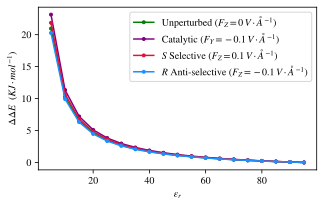

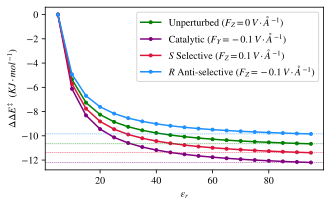

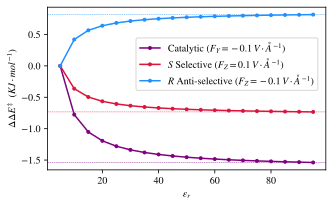

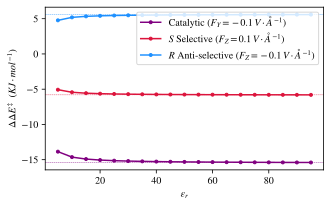

In [21]:
t_s_reduced = np.subtract(t_s, min(t_s)) 
t_r_reduced = np.subtract(t_r, min(t_r)) 
t_c_reduced = np.subtract(t_c, min(t_c)) 
t_u_reduced = np.subtract(t_u, min(t_u)) 

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, t_u_reduced, marker='.', label=r"Unperturbed ($F_Z=0\:V\cdot\AA^{-1}$)", color='g')
ax1.plot(dielectrics, t_c_reduced, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectrics, t_s_reduced, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectrics, t_r_reduced, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')

ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
ax1.legend()
plt.show()

bh_s = np.subtract(t_s, r_s) 
bh_r = np.subtract(t_r, r_r) 
bh_c = np.subtract(t_c, r_c) 
bh_u = np.subtract(t_u, r_u) 


bh_s_reduced = np.subtract(bh_s, max(bh_s)) 
bh_r_reduced = np.subtract(bh_r, max(bh_r)) 
bh_c_reduced = np.subtract(bh_c, max(bh_c)) 
bh_u_reduced = np.subtract(bh_u, max(bh_u)) 

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, bh_u_reduced, marker='.', label=r"Unperturbed ($F_Z=0\:V\cdot\AA^{-1}$)", color='g')
ax1.plot(dielectrics, bh_c_reduced, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectrics, bh_s_reduced, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectrics, bh_r_reduced, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
ax1.axhline(min(bh_r_reduced), linewidth=0.4, linestyle='--', color='dodgerblue')
ax1.axhline(min(bh_s_reduced), linewidth=0.4, linestyle='--', color='crimson')
ax1.axhline(min(bh_c_reduced), linewidth=0.4, linestyle='--', color='purple')
ax1.axhline(min(bh_u_reduced), linewidth=0.4, linestyle='--', color='g')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
ax1.legend()
plt.show()


bh_s_reduced_diff = np.subtract(bh_s_reduced, bh_u_reduced) 
bh_r_reduced_diff = np.subtract(bh_r_reduced, bh_u_reduced) 
bh_c_reduced_diff = np.subtract(bh_c_reduced, bh_u_reduced) 

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, bh_c_reduced_diff, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectrics, bh_s_reduced_diff, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectrics, bh_r_reduced_diff, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')
ax1.axhline(max(bh_r_reduced_diff), linewidth=0.4, linestyle='--', color='dodgerblue')
ax1.axhline(min(bh_s_reduced_diff), linewidth=0.4, linestyle='--', color='crimson')
ax1.axhline(min(bh_c_reduced_diff), linewidth=0.4, linestyle='--', color='purple')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
ax1.legend(bbox_to_anchor=(0.3, 0.65))
plt.show()


bh_s_reduced_diff2 = np.subtract(bh_s, bh_u) 
bh_r_reduced_diff2 = np.subtract(bh_r, bh_u) 
bh_c_reduced_diff2 = np.subtract(bh_c, bh_u) 

fig, ax1 = plt.subplots(1,1, figsize=(5,3))
ax1.plot(dielectrics, bh_c_reduced_diff2, marker='.', label=r"Catalytic ($F_Y=-0.1\:V\cdot\AA^{-1}$)", color='purple')
ax1.plot(dielectrics, bh_s_reduced_diff2, marker='.', label=r"$S$ Selective ($F_Z=0.1\:V\cdot\AA^{-1}$)", color='crimson')
ax1.plot(dielectrics, bh_r_reduced_diff2, marker='.', label=r"$R$ Anti-selective ($F_Z=-0.1\:V\cdot\AA^{-1}$)", color='dodgerblue')

ax1.axhline(max(bh_r_reduced_diff2), linewidth=0.4, linestyle='--', color='dodgerblue')
ax1.axhline(min(bh_s_reduced_diff2), linewidth=0.4, linestyle='--', color='crimson')
ax1.axhline(min(bh_c_reduced_diff2), linewidth=0.4, linestyle='--', color='purple')
ax1.set_xlabel(r"$\varepsilon_r$")
ax1.set_ylabel(r"$\Delta\Delta E^\ddag$  ($KJ\cdot mol^{-1}$)")
# ax1.set_ylim(-17, 0)
ax1.legend()
plt.show()

/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/3867356076.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


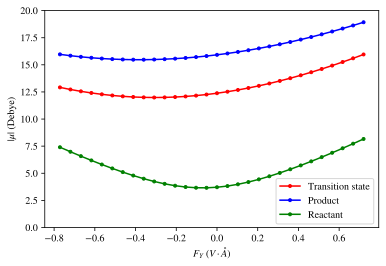

In [22]:
fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]
fields = np.multiply(fields, 51.4220674763)

# e = eh2kjmol(e)

dipole = [12.91929, 12.72659, 12.55557, 12.40646, 12.27956, 12.17515, 12.09347, 12.03466, 11.99881, 11.98594, 11.99596, 12.02869, 12.08388, 12.16118, 12.26018, 12.38038, 12.52124, 12.68217, 12.86256, 13.06176, 13.27913, 13.51402, 13.76580, 14.03386, 14.31764, 14.61658, 14.93021, 15.25808, 15.59980, 15.95505]
dipole_p = [15.96453, 15.84145, 15.73631, 15.64890, 15.57905, 15.52661, 15.49144, 15.47337, 15.47224, 15.48787, 15.52006, 15.56859, 15.63322, 15.71371, 15.80978, 15.92116, 16.04755, 16.18866, 16.34418, 16.51381, 16.69724, 16.89418, 17.10434, 17.32743, 17.56321, 17.81141, 18.07182, 18.34424, 18.62850, 18.92446]
dipole_r = [7.40095, 6.98411, 6.57873, 6.18627, 5.80851, 5.44776, 5.10691, 4.78954, 4.50004, 4.24356, 4.02597, 3.85346, 3.73200, 3.66645, 3.65971, 3.71209, 3.82124, 3.98264, 4.19052, 4.43864, 4.72105, 5.03239, 5.36811, 5.72445, 6.09836, 6.48742, 6.88973, 7.30380, 7.72851, 8.16301]

fig, ax = plt.subplots(1,1, figsize=(6,4))
# ax.plot(fields, e, marker='.', label='Dielectric stabilisation')
# ax.plot(fields, charge, marker='.')

ax.set_ylabel(r"$|\mu|$ (Debye)")
ax.plot(fields, dipole, marker='.', color='r', label='Transition state')
ax.plot(fields, dipole_p, marker='.', color='b', label='Product')
ax.plot(fields, dipole_r, marker='.', color='g', label='Reactant')
ax.set_xlabel(r"$F_Y$ ($V\cdot\AA$)")
fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.12))
ax.set_ylim(0, 20)
fig.show()

/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/2554287918.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


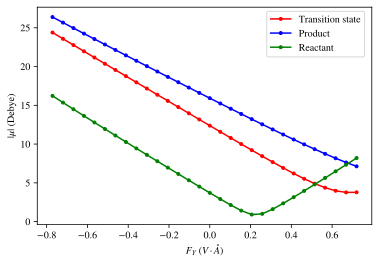

In [23]:
e = [-0.11607292, -0.11086897, -0.10582662, -0.10094353, -0.09621753, -0.09164705, -0.08723102, -0.08296886, -0.07886044, -0.07490601, -0.07110623, -0.06746210, -0.06397498, -0.06064652, -0.05747872, -0.05447385, -0.05163448, -0.04896348, -0.04646397, -0.04413938, -0.04199340, -0.04003007, -0.03825373, -0.03666909, -0.03528128, -0.03409592, -0.03311918, -0.03235797, -0.03182003, -0.03151422]
fields = [-0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006,
          -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
          0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]
fields = np.multiply(fields, 51.4220674763)

e = eh2kjmol(e)

charge = [-0.06743231, -0.06685304, -0.06631836, -0.06582625, -0.06537503, -0.06496329, -0.06458983, -0.06425370, -0.06395410, -0.06369041, -0.06346216, -0.06326903, -0.06311082, -0.06298749, -0.06289911, -0.06284588, -0.06282815, -0.06284638, -0.06290121, -0.06299340, -0.06312390, -0.06329388, -0.06350468, -0.06375794, -0.06405559, -0.06439995, -0.06479380, -0.06524053, -0.06574435, -0.06631063]
dipole = [24.39148, 23.58047, 22.77263, 21.96742, 21.16431, 20.36284, 19.56261, 18.76327, 17.96455, 17.16620, 16.36806, 15.57004, 14.77211, 13.97438, 13.17704, 12.38045, 11.58519, 10.79212, 10.00248,  9.21810,  8.44161,  7.67691,  6.92976,  6.20889,  5.52766,  4.90654,  4.37630,  3.98000,  3.76824,  3.78173]
dipole_r = [16.21957, 15.35326, 14.49350, 13.63973, 12.79138, 11.94793, 11.10890, 10.27385,  9.44240,  8.61408,  7.78893,  6.96675,  6.14733,  5.33105,  4.51870,  3.71211,  2.91554,  2.14011,  1.42168,  0.91029,  1.00506,  1.60508,  2.35383,  3.14955,  3.96658,  4.79655,  5.63624,  6.48443,  7.34079,  8.20554]
dipole_p = [26.38458, 25.67117, 24.96075, 24.25303, 23.54783, 22.84486, 22.14401, 21.44516, 20.74815, 20.05303, 19.35969, 18.66819, 17.97844, 17.29059, 16.60477, 15.92117, 15.24007, 14.56183, 13.88696, 13.21609, 12.55005, 11.88994, 11.23716, 10.59356,  9.96154,  9.34427,  8.74592,  8.17203,  7.62995,  7.12946]

fig, ax = plt.subplots(1,1, figsize=(6,4))
# ax.plot(fields, e, marker='.', label='Dielectric stabilisation')
# ax.plot(fields, charge, marker='.')

ax.set_ylabel(r"$|\mu|$ (Debye)")
ax.plot(fields, dipole, marker='.', color='r', label='Transition state')
ax.plot(fields, dipole_p, marker='.', color='b', label='Product')
ax.plot(fields, dipole_r, marker='.', color='g', label='Reactant')
ax.set_xlabel(r"$F_Y$ ($V\cdot\AA$)")
fig.legend(loc='lower center', bbox_to_anchor=(0.77, 0.69))
# ax.set_ylim(0, 25)
fig.show()



la1t attaching
COMPLETE


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/2979512873.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


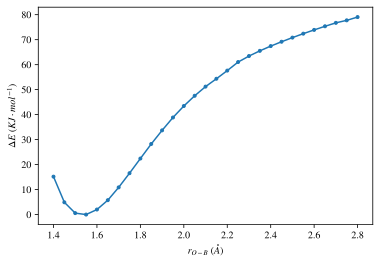

In [24]:
print("la1t attaching\nCOMPLETE")
e = [-1034.0798397567921, -1034.083753323648, -1034.085401167705, -1034.085620683761, -1034.084853213637, -1034.0834302666722, -1034.0814788842602, -1034.0793170658849, -1034.077080110583, -1034.07486050168, -1034.072785976495, -1034.070825922732, -1034.069074305969, -1034.067513174248, -1034.0661175976811, -1034.064919161045, -1034.0636750437288, -1034.062373179102, -1034.061457481171, -1034.060664409586, -1034.0599419404612, -1034.059277071957, -1034.0586470938931, -1034.058045481362, -1034.057471321745, -1034.056920969976, -1034.056397321448, -1034.056016170517, -1034.0555171760432]

x = list(range(140, 140+(len(e)*5), 5))
x = np.multiply(x, 0.01)
e = eh2kjmol(e)
e = np.subtract(e, min(e))
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x, e, marker='.')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{O-B}$ ($\AA$)")
fig.show()


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/92789217.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ba11t protonation
COMPLETE


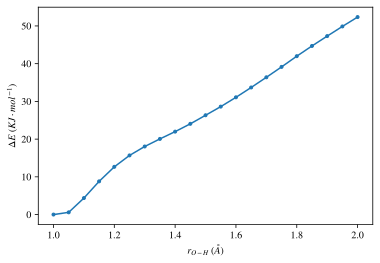

In [25]:
print("ba11t protonation\nCOMPLETE")
e = [-786.293306019305, -786.2930817833779, -786.291640453818, -786.289955291605, -786.288486227229, -786.287334436754, -786.286433421853, -786.28566758224, -786.284932565206, -786.284144000281, -786.283281344365, -786.282408149361, -786.281469102708, -786.280476380773, -786.27944982443, -786.278397538102, -786.277317310556, -786.2762836544371, -786.275290005705, -786.2743132631949, -786.2733682229939]

x = list(range(100, 100+(len(e)*5), 5))
x = np.multiply(x, 0.01)
e = eh2kjmol(e)
e = np.subtract(e, min(e))
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x, e, marker='.')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{O-H}$ ($\AA$)")
fig.show()

ba2t cyclisation
COMPLETE


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/386353714.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


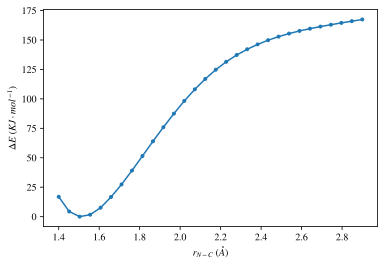

In [26]:
print("ba2t cyclisation\nCOMPLETE")
e  = [-709.8057028665639, -709.8062492555839, -709.806815369416, -709.807400463791, -709.808007045993, -709.808674517545, -709.8094094411521, -709.810268113896, -709.8112577704361, -709.8124133380941, -709.813768085013, -709.815348565901, -709.817200270938, -709.819390019316, -709.821958253875, -709.824938420761, -709.828304962895, -709.832053397336, -709.83616729481, -709.840563626264, -709.845125797817, -709.849864704638, -709.8545718460219, -709.859067562433, -709.863118347792, -709.866588018081, -709.868856621855, -709.869485278237, -709.867818878674, -709.863055325884]
x = [2.90000000, 2.84827586, 2.79655172, 2.74482759, 2.69310345, 2.64137931, 2.58965517, 2.53793103, 2.48620690, 2.43448276, 2.38275862, 2.33103448, 2.27931034, 2.22758621, 2.17586207, 2.12413793, 2.07241379, 2.02068966, 1.96896552, 1.91724138, 1.86551724, 1.81379310, 1.76206897, 1.71034483, 1.65862069, 1.60689655, 1.55517241, 1.50344828, 1.45172414, 1.40000000]

e = eh2kjmol(e)
e = np.subtract(e, min(e))
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x, e, marker='.')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{N-C}$ ($\AA$)")
fig.show()


lb2t cyclisation
COMPLETE


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/2994335236.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


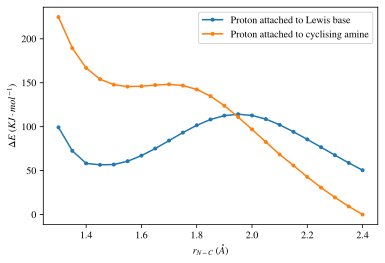

In [27]:
print("lb2t cyclisation\nCOMPLETE")

e = [-960.7517420433351, -960.74856528389, -960.745220307779, -960.741771955863, -960.738379181524, -960.735080256044, -960.7320541558311, -960.7295770716639, -960.727997093794, -960.72746452991, -960.7280694432241, -960.72973037191, -960.7322615902781, -960.735415416095, -960.7388755948141, -960.7423255489699, -960.7453911453159, -960.7478228008721, -960.749270872453, -960.749382423051, -960.748765293175, -960.743317024165, -960.733148333705]
e2 = [-960.770948117242, -960.767424057157, -960.763529475755, -960.759272451382, -960.754657031066, -960.749707085069, -960.744901488712, -960.7394970634759, -960.73404144628, -960.72870425678, -960.723760851644, -960.719634254323, -960.716710726242, -960.715021510532, -960.714514527543, -960.7148120313091, -960.7153326113549, -960.7154908761039, -960.7146402249091, -960.712271193447, -960.70738050063, -960.698827646055, -960.68535291902]
e3 = []

# minnum = min([min(e), min(e2), min(e3)])
minnum = min([min(e), min(e2)])
e = eh2kjmol(np.subtract(e, minnum))
e2 = eh2kjmol(np.subtract(e2, minnum))
# e3 = eh2kjmol(np.subtract(e3, minnum))

x = list(reversed(range(245-(len(e)*5), 245, 5)))
x = np.multiply(x, 0.01)

x2 = list(reversed(range(245-(len(e2)*5), 245, 5)))
x2 = np.multiply(x2, 0.01)

# x3 = list(reversed(range(220-(len(e3)*5), 220, 5)))
# x3 = np.multiply(x3, 0.01)


fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x, e, marker='.', label='Proton attached to Lewis base')
ax.plot(x2, e2, marker='.', label='Proton attached to cyclising amine')
# ax.plot(x, e3, marker='.', label='Lewis base stabilising TS')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{N-C}$ ($\AA$)")
ax.legend()
fig.show()


lb2t leaving
DONE


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/4035328857.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


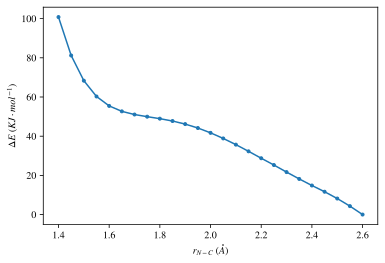

In [28]:
print("lb2t leaving\nDONE")
e = [-960.71662427927, -960.72409100443, -960.728989448443, -960.73206119428, -960.7338956396969, -960.734953574838, -960.735569680303, -960.735987390631, -960.7363735253821, -960.736833619402, -960.737430686516, -960.738194255325, -960.739129748949, -960.74021717583, -960.741422650169, -960.742725576568, -960.744070994691, -960.74538811093, -960.746763773105, -960.748091746195, -960.7493679329649, -960.750577278681, -960.751900500008, -960.7533794020701, -960.755016751694]
r = list(range(140, 140+(len(e)*5), 5))
r = np.multiply(r, 0.01)

minnum = min(e)
e = eh2kjmol(np.subtract(e, minnum))

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(r, e, marker='.')
# ax.plot(x2, e3, marker='.', label='no proton')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{N-C}$ ($\AA$)")
fig.show()


lb2t non-coordinating proton transfer
DONE


/var/folders/yb/zhdwwsqx1g5_tjj4y94g2sfr0000gn/T/ipykernel_11981/3956842736.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


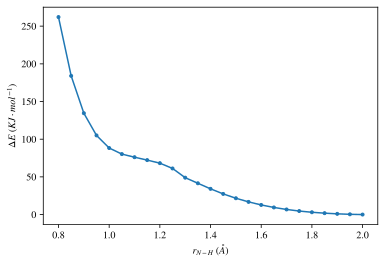

In [29]:
print("lb2t non-coordinating proton transfer\nDONE")
e = [-960.93713155944, -960.9668450044969, -960.9857149759571, -960.996941098892, -961.0033125730849, -961.00638514371, -961.007954393098, -961.009423338777, -961.010965534831, -961.013639379747, -961.018300568767, -961.021135376911, -961.023942054691, -961.026508413097, -961.0286980480209, -961.0305373976071, -961.032083148992, -961.033346718642, -961.034361154061, -961.035165914873, -961.035779635351, -961.0362373502161, -961.0365784108781, -961.036815773511, -961.0369440494629]
de = (2.0-0.8)/24
r = []
current = 0.8
for i in e:
    r += [current]
    current += de

minnum = min(e)
e = eh2kjmol(np.subtract(e, minnum))

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(r, e, marker='.')
# ax.plot(x2, e3, marker='.', label='no proton')
ax.set_ylabel(r"$\Delta E$ ($KJ\cdot mol^{-1}$)")
ax.set_xlabel(r"$r_{N-H}$ ($\AA$)")
fig.show()

